In [1]:
import warnings                        
warnings.filterwarnings("ignore")
%matplotlib inline
%pylab inline
import os
import pandas as pd
import librosa
import librosa.display
import glob 
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow as tf; print('tensorflow version: ', tf.__version__)
import keras; print('keras version: ',keras.__version__)

tensorflow version:  2.16.1
keras version:  3.3.3


In [3]:
INPUT_DIR="input/"

SAMPLE_RATE = 16000

MAX_SOUND_CLIP_DURATION=12 

In [4]:
set_a=pd.read_csv(INPUT_DIR+"/set_a.csv")
set_a.head()


dataset                             fname     label  sublabel
0       a  set_a/artifact__201012172012.wav  artifact       NaN
1       a  set_a/artifact__201105040918.wav  artifact       NaN
2       a  set_a/artifact__201105041959.wav  artifact       NaN
3       a  set_a/artifact__201105051017.wav  artifact       NaN
4       a  set_a/artifact__201105060108.wav  artifact       NaN

In [5]:
set_a_timing=pd.read_csv(INPUT_DIR+"/set_a_timing.csv")
set_a_timing.head()

fname  cycle sound  location
0  set_a/normal__201102081321.wav      1    S1     10021
1  set_a/normal__201102081321.wav      1    S2     20759
2  set_a/normal__201102081321.wav      2    S1     35075
3  set_a/normal__201102081321.wav      2    S2     47244
4  set_a/normal__201102081321.wav      3    S1     62992

In [6]:
set_b=pd.read_csv(INPUT_DIR+"/set_b.csv")
set_b.head()

dataset                                              fname       label  \
0       b  set_b/Btraining_extrastole_127_1306764300147_C...  extrastole   
1       b  set_b/Btraining_extrastole_128_1306344005749_A...  extrastole   
2       b  set_b/Btraining_extrastole_130_1306347376079_D...  extrastole   
3       b  set_b/Btraining_extrastole_134_1306428161797_C...  extrastole   
4       b  set_b/Btraining_extrastole_138_1306762146980_B...  extrastole   

  sublabel  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [7]:
frames = [set_a, set_b]
train_ab=pd.concat(frames)
train_ab.describe()

dataset                             fname   label     sublabel
count      832                               832     585          149
unique       2                               832       5            2
top          b  set_a/artifact__201012172012.wav  normal  noisynormal
freq       656                                 1     351          120

In [8]:
nb_classes=train_ab.label.unique()

print("Number of training examples=", train_ab.shape[0], "  Number of classes=", len(train_ab.label.unique()))
print (nb_classes)

Number of training examples= 832   Number of classes= 6
['artifact' 'extrahls' 'murmur' 'normal' nan 'extrastole']


Min samples per category =  19
Max samples per category =  351


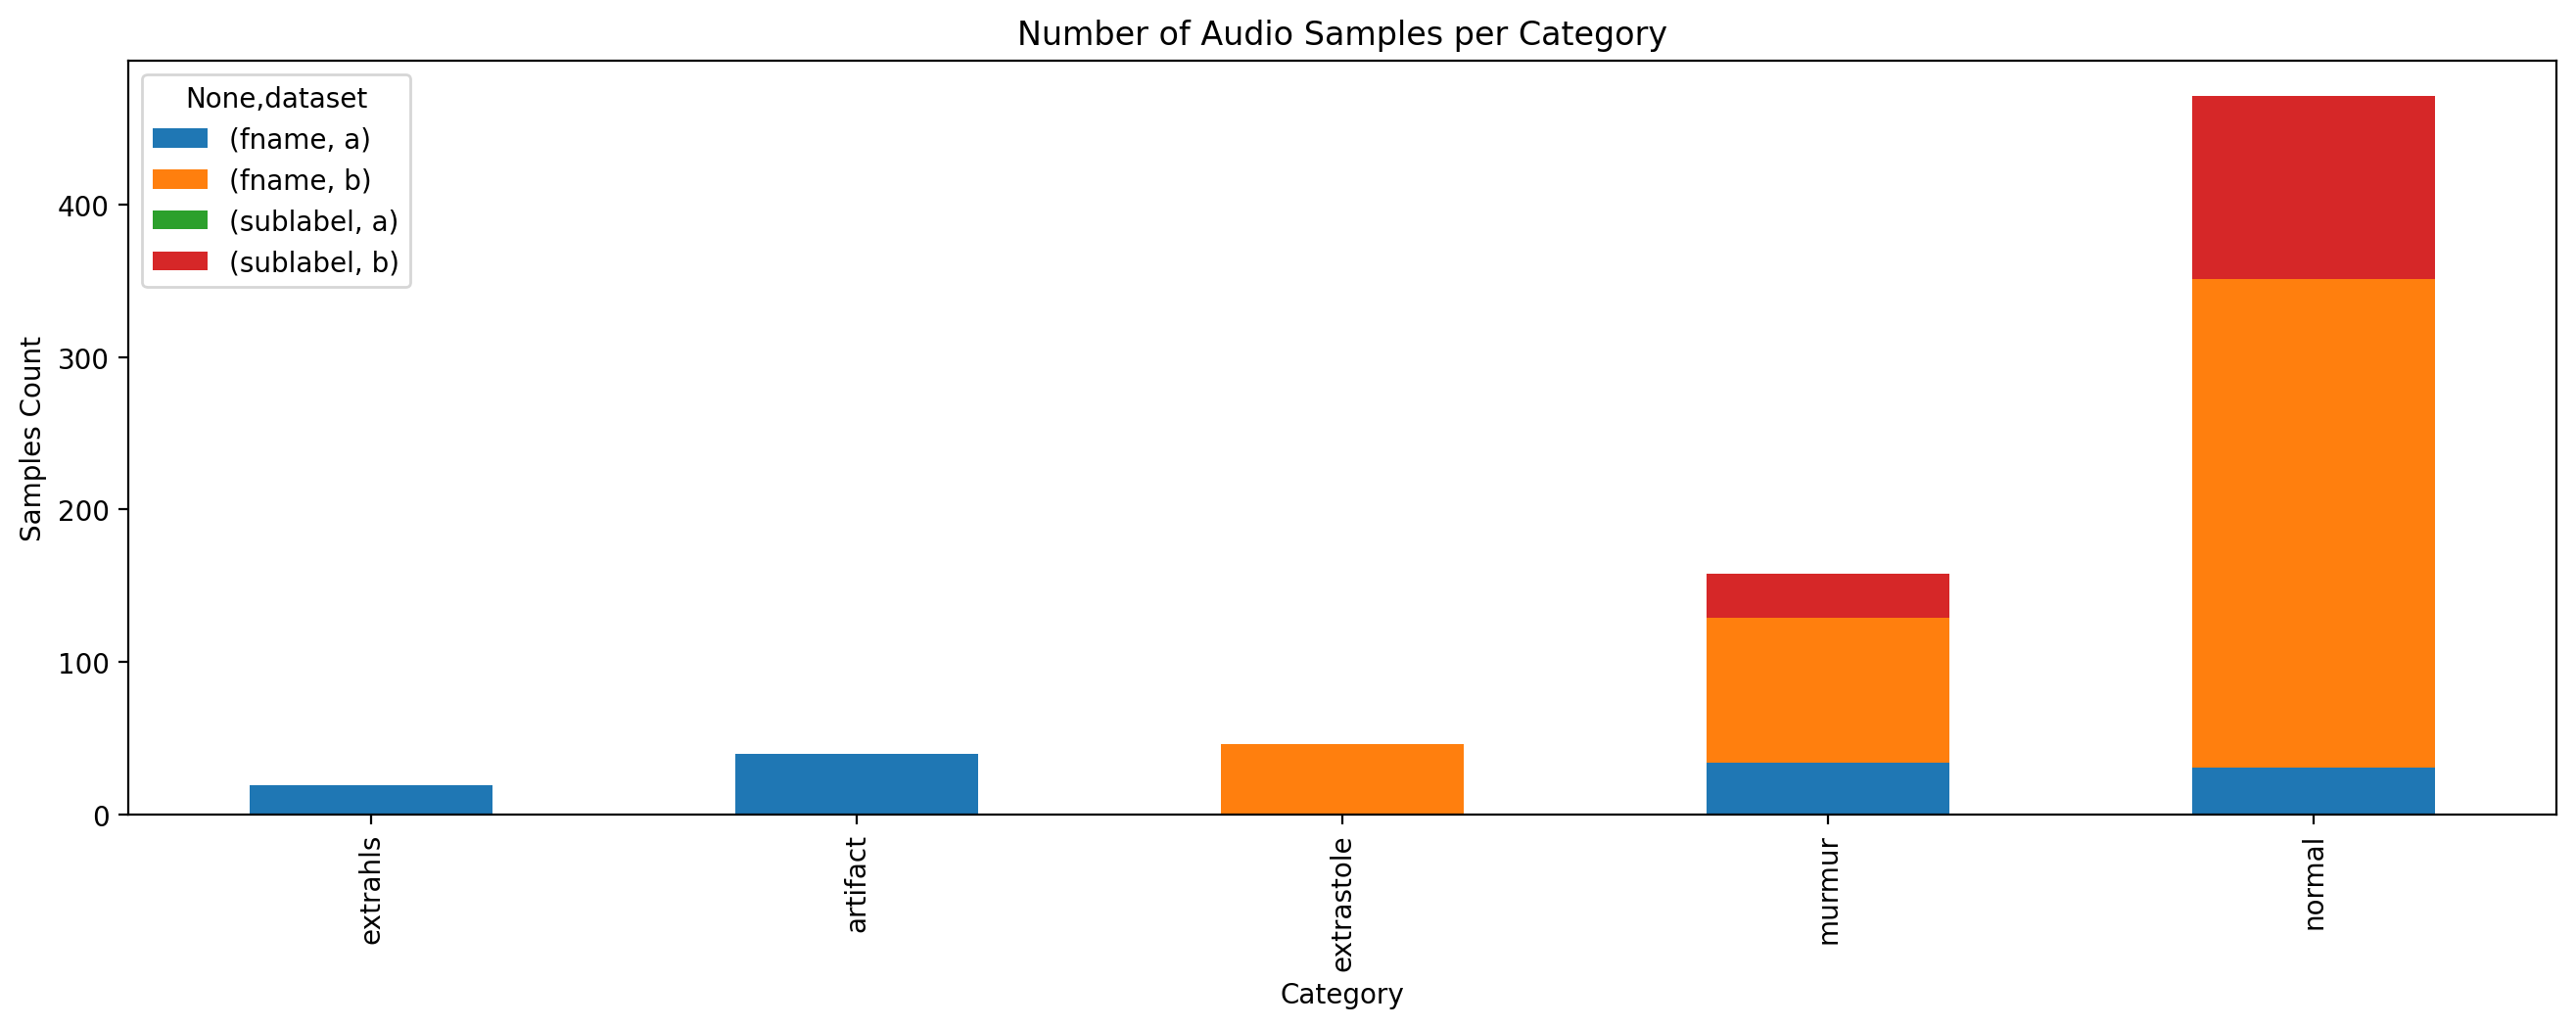

In [9]:
category_group = train_ab.groupby(['label','dataset']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(16,5))
plot.set_xlabel("Category")
plot.set_ylabel("Samples Count");

print('Min samples per category = ', min(train_ab.label.value_counts()))
print('Max samples per category = ', max(train_ab.label.value_counts()))

In [10]:
print('Minimum samples per category = ', min(train_ab.label.value_counts()))
print('Maximum samples per category = ', max(train_ab.label.value_counts()))

Minimum samples per category =  19
Maximum samples per category =  351


In [11]:
normal_file=INPUT_DIR+"/set_a/normal__201106111136.wav"


In [12]:
# heart it
import IPython.display as ipd
ipd.Audio(normal_file) 

In [13]:
# Load use wave 
import wave
wav = wave.open(normal_file)
print("Sampling (frame) rate = ", wav.getframerate())
print("Total samples (frames) = ", wav.getnframes())
print("Duration = ", wav.getnframes()/wav.getframerate())

Sampling (frame) rate =  44100
Total samples (frames) =  218903
Duration =  4.963786848072562


In [14]:
# Load use scipy
from scipy.io import wavfile
rate, data = wavfile.read(normal_file)
print("Sampling (frame) rate = ", rate)
print("Total samples (frames) = ", data.shape)
print(data)

Sampling (frame) rate =  44100
Total samples (frames) =  (218903,)
[-22835 -22726 -22595 ...   -474   -450   -439]


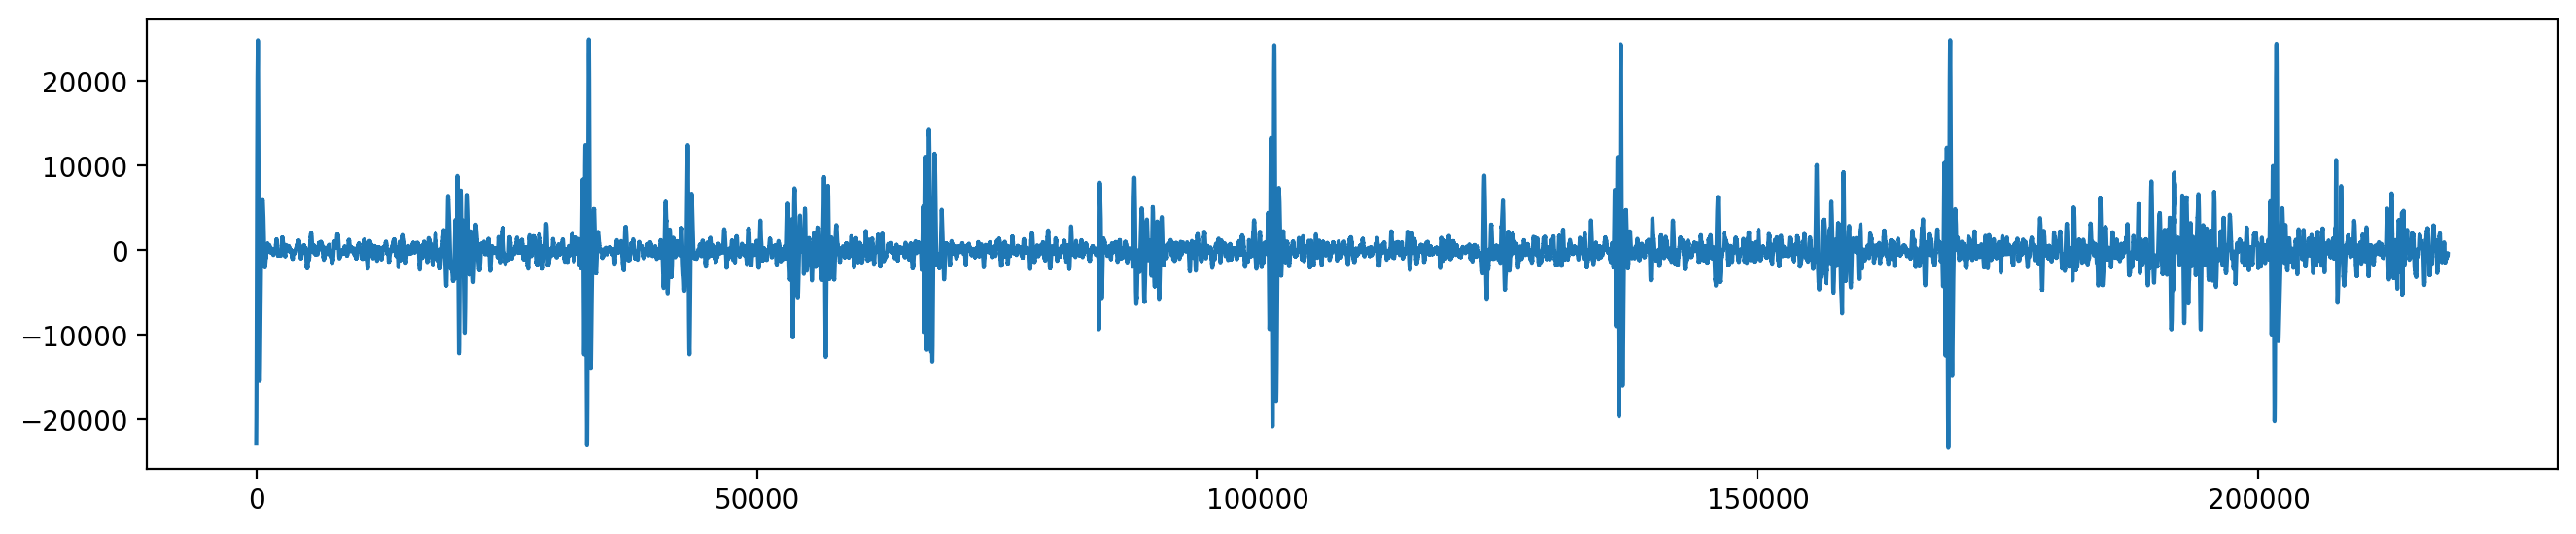

In [15]:
plt.figure(figsize=(16, 3))
plt.plot(data, '-', );

In [16]:

y, sr = librosa.load(normal_file, duration=5) 

dur = librosa.get_duration(y=y, sr=sr)

print("Duration:", dur)
print(y.shape, sr)


Duration: 4.963809523809524
(109452,) 22050


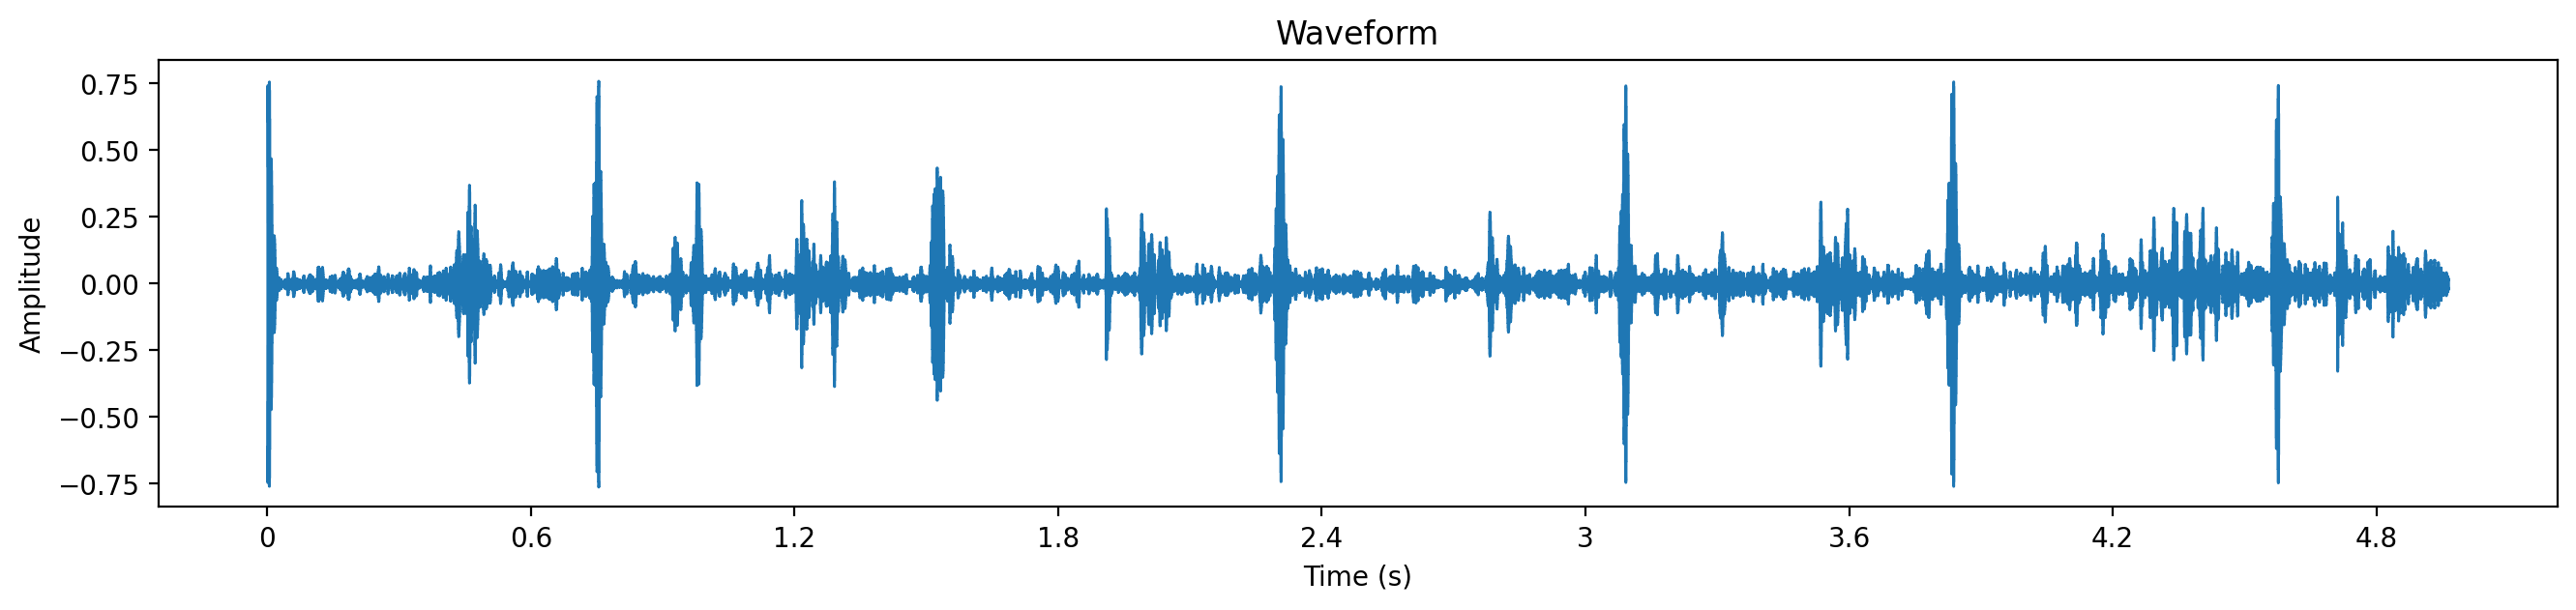

In [17]:
import librosa
import librosa.display
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 3))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


In [18]:
import librosa


murmur_file = INPUT_DIR + "/set_a/murmur__201108222231.wav"


y2, sr2 = librosa.load(murmur_file, duration=5)


dur = librosa.get_duration(y=y2, sr=sr2)


print("Duration:", dur)
print(y2.shape, sr2)


Duration: 5.0
(110250,) 22050


In [19]:
import IPython.display as ipd
ipd.Audio(murmur_file)

Duration: 5.0
(110250,) 22050


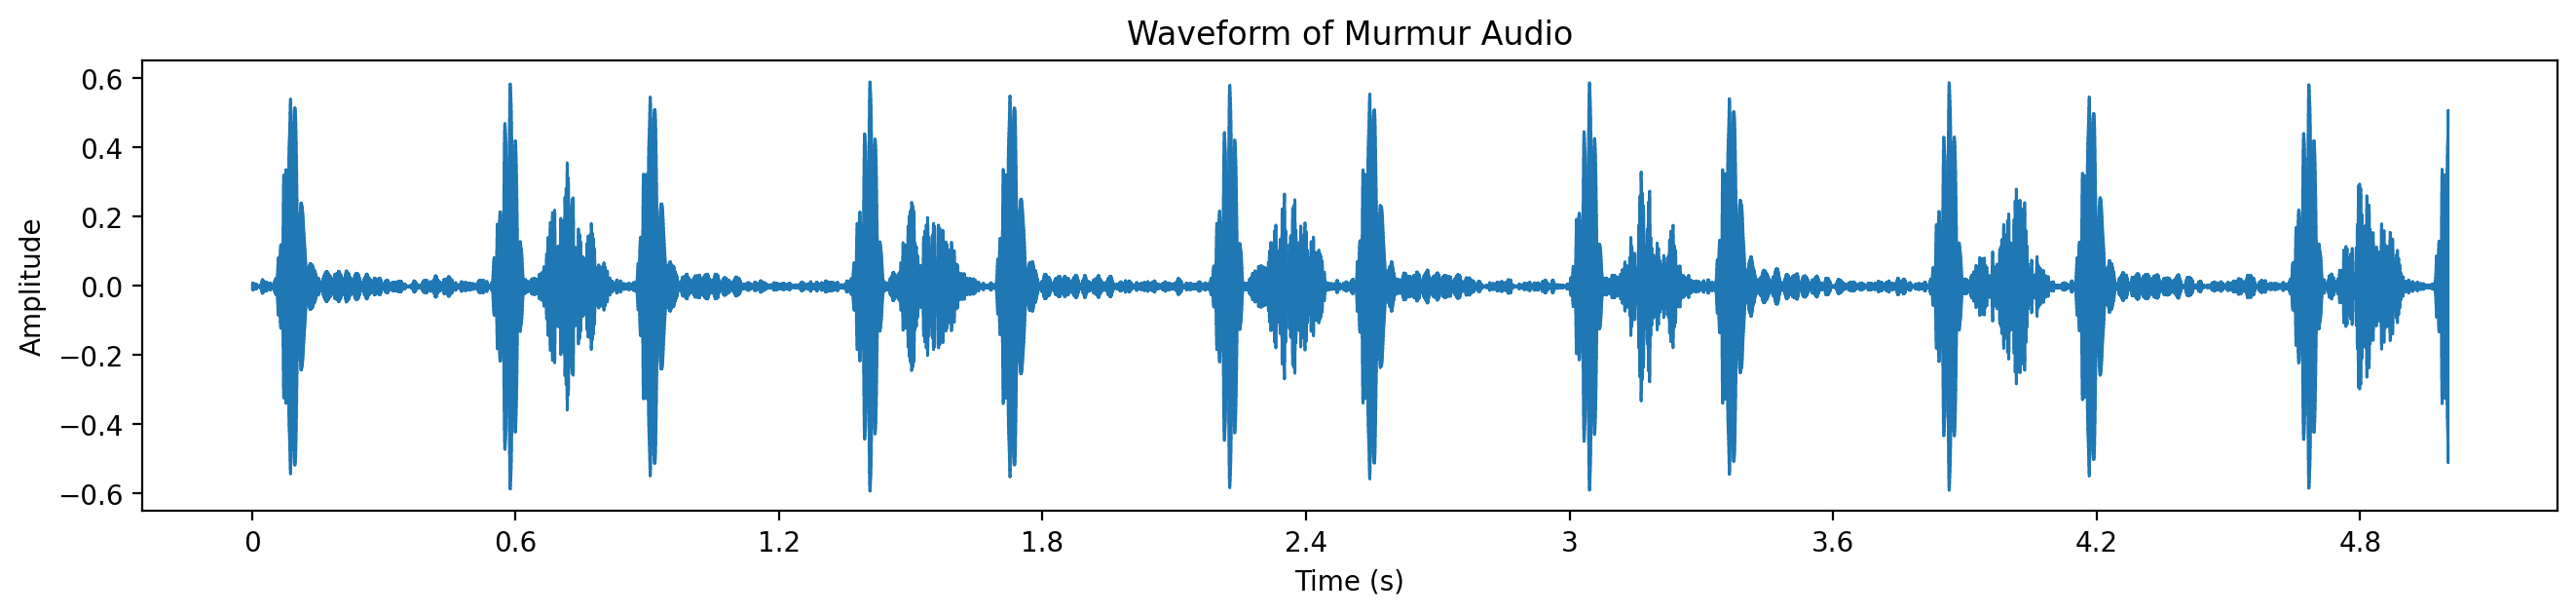

In [20]:
import librosa
import librosa.display
import matplotlib.pyplot as plt



y2, sr2 = librosa.load(murmur_file, duration=5)


dur = librosa.get_duration(y=y2, sr=sr2)

# Print the duration and the shape of the audio signal
print("Duration:", dur)
print(y2.shape, sr2)

# Plot the waveform using waveshow
plt.figure(figsize=(16, 3))
librosa.display.waveshow(y2, sr=sr2)
plt.title('Waveform of Murmur Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


In [21]:
import librosa
import os

# Define base input directory
INPUT_DIR = 'C:/Users/krake/Downloads/deep learning/Heart-Beat-Classification-master/heartbeatclass/input'

# Define file paths using os.path.join
extrastole_file = os.path.join(INPUT_DIR, "set_b", "extrastole__127_1306764300147_C2.wav")

# Debugging: print the full path
print("Extrastole file path:", extrastole_file)

# Load the extrasystole audio file
try:
    y3, sr3 = librosa.load(extrastole_file, duration=5)
    dur = librosa.get_duration(y=y3, sr=sr3)
    print("Extrasystole file - Duration:", dur3)
    print(y3.shape, sr3)
except FileNotFoundError as e:
    print(f"File not found: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


Extrastole file path: C:/Users/krake/Downloads/deep learning/Heart-Beat-Classification-master/heartbeatclass/input\set_b\extrastole__127_1306764300147_C2.wav
An error occurred: name 'dur3' is not defined


In [22]:
import IPython.display as ipd
ipd.Audio(extrastole_file) 

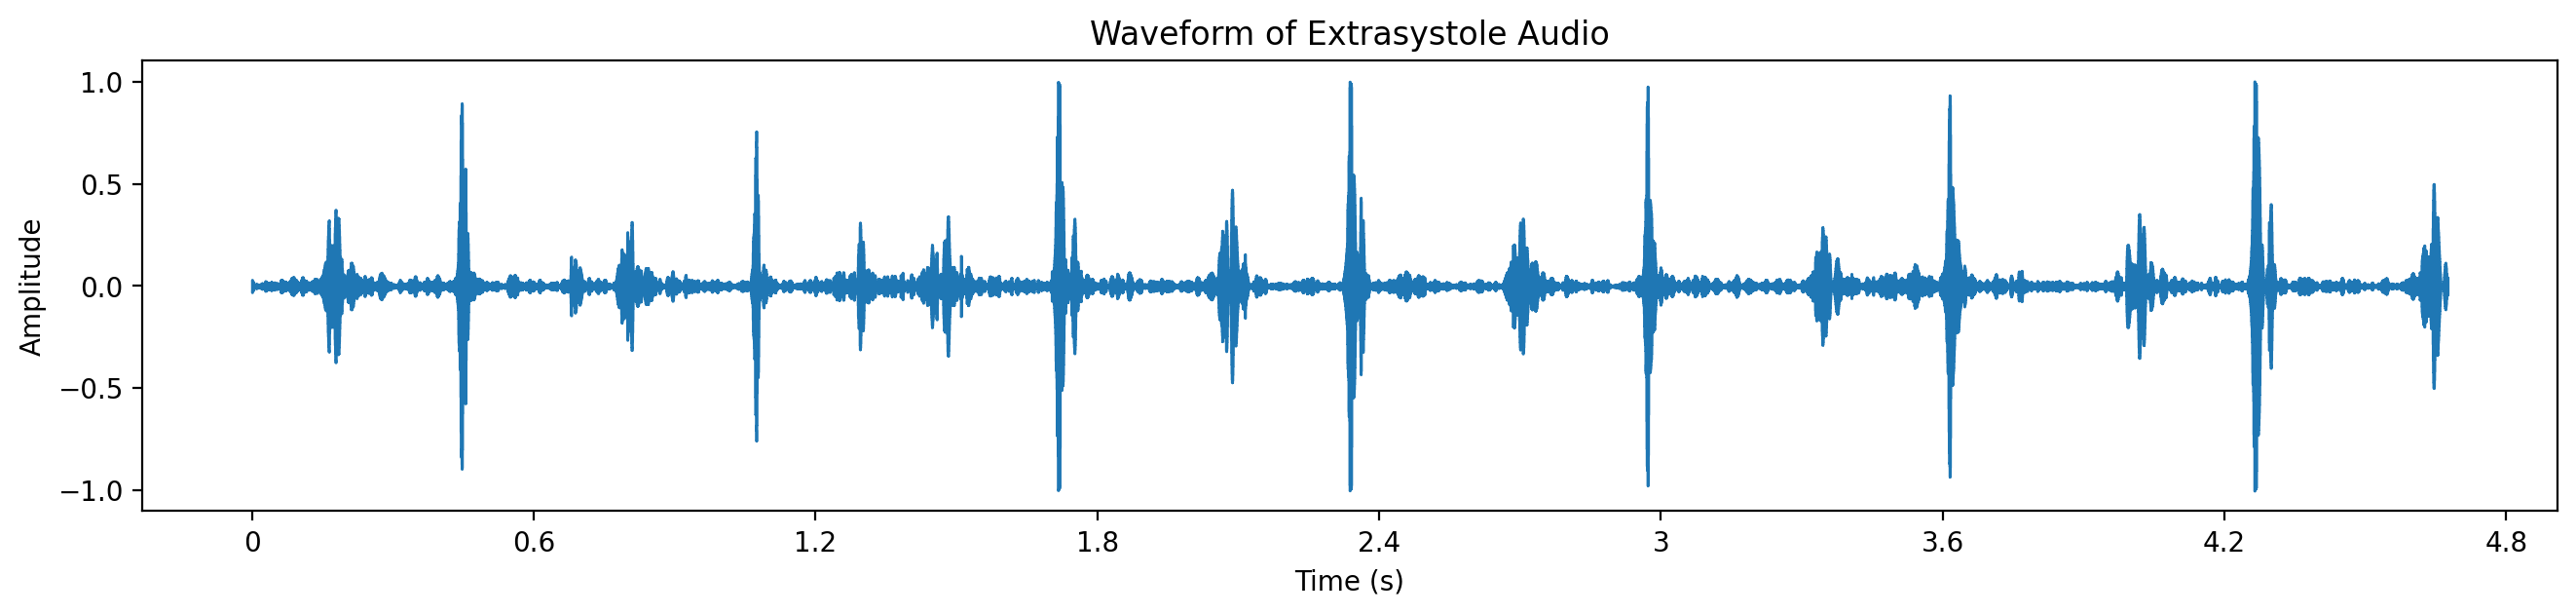

In [23]:
plt.figure(figsize=(16, 3))
librosa.display.waveshow(y3, sr=sr3)
plt.title('Waveform of Extrasystole Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [24]:
import librosa
import os

# Define base input directory
INPUT_DIR = 'C:/Users/krake/Downloads/deep learning/Heart-Beat-Classification-master/heartbeatclass/input'

# Define file path using os.path.join
artifact_file = os.path.join(INPUT_DIR, "set_a", "artifact__201012172012.wav")

# Debugging: print the full path
print("Artifact file path:", artifact_file)

# Load the artifact audio file
try:
    y4, sr4 = librosa.load(artifact_file, duration=5)
    dur4 = librosa.get_duration(y=y4, sr=sr4)
    print("Artifact file - Duration:", dur4)
    print(y4.shape, sr4)
except FileNotFoundError as e:
    print(f"File not found: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


Artifact file path: C:/Users/krake/Downloads/deep learning/Heart-Beat-Classification-master/heartbeatclass/input\set_a\artifact__201012172012.wav
Artifact file - Duration: 5.0
(110250,) 22050


In [25]:
import IPython.display as ipd
ipd.Audio(artifact_file) 

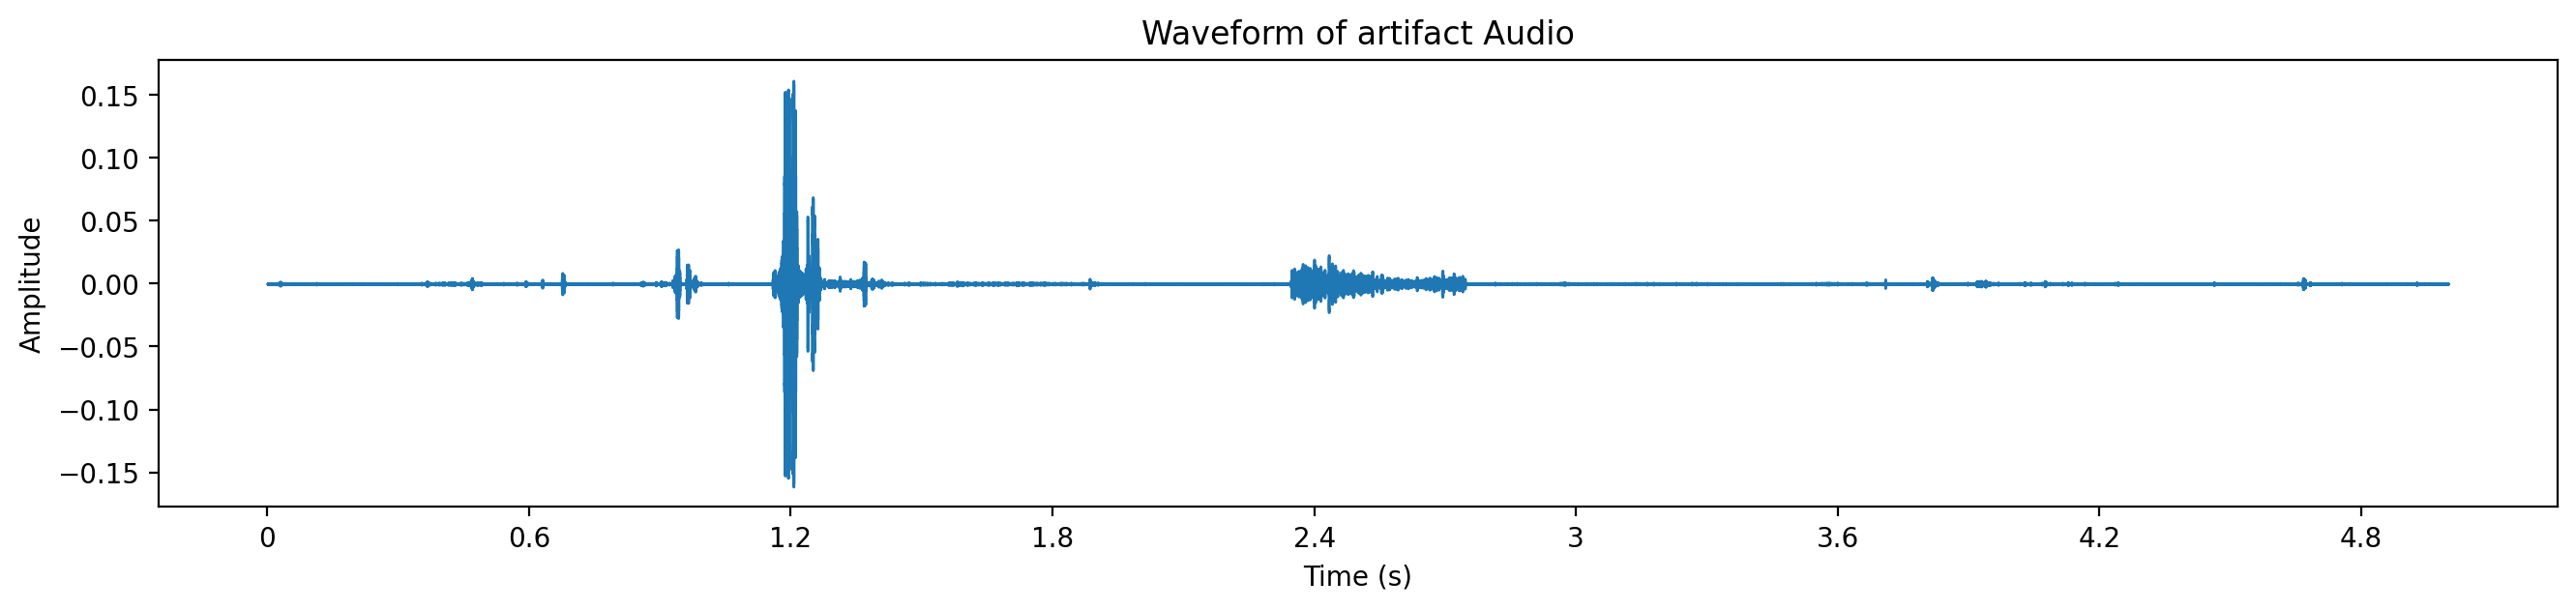

In [26]:

# show it
plt.figure(figsize=(16, 3))
librosa.display.waveshow(y4, sr=sr4)
plt.title('Waveform of artifact Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [27]:
import librosa
import os

# Define base input directory
INPUT_DIR = 'C:/Users/krake/Downloads/deep learning/Heart-Beat-Classification-master/heartbeatclass/input'

# Define file paths using os.path.join
extrahls_file = os.path.join(INPUT_DIR, "set_a", "extrahls__201101070953.wav")

# Debugging: print the full path
print("extrahls_file path:", extrahls_file)
try:
    y5, sr5 = librosa.load(extrahls_file, duration=5)
    dur = librosa.get_duration(y=y4, sr=sr4)
    print("Extrasystole file - Duration:", dur4)
    print(y4.shape, sr4)
except FileNotFoundError as e:
    print(f"File not found: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


extrahls_file path: C:/Users/krake/Downloads/deep learning/Heart-Beat-Classification-master/heartbeatclass/input\set_a\extrahls__201101070953.wav
Extrasystole file - Duration: 5.0
(110250,) 22050


In [28]:
# heart it
import IPython.display as ipd
ipd.Audio(extrahls_file) 

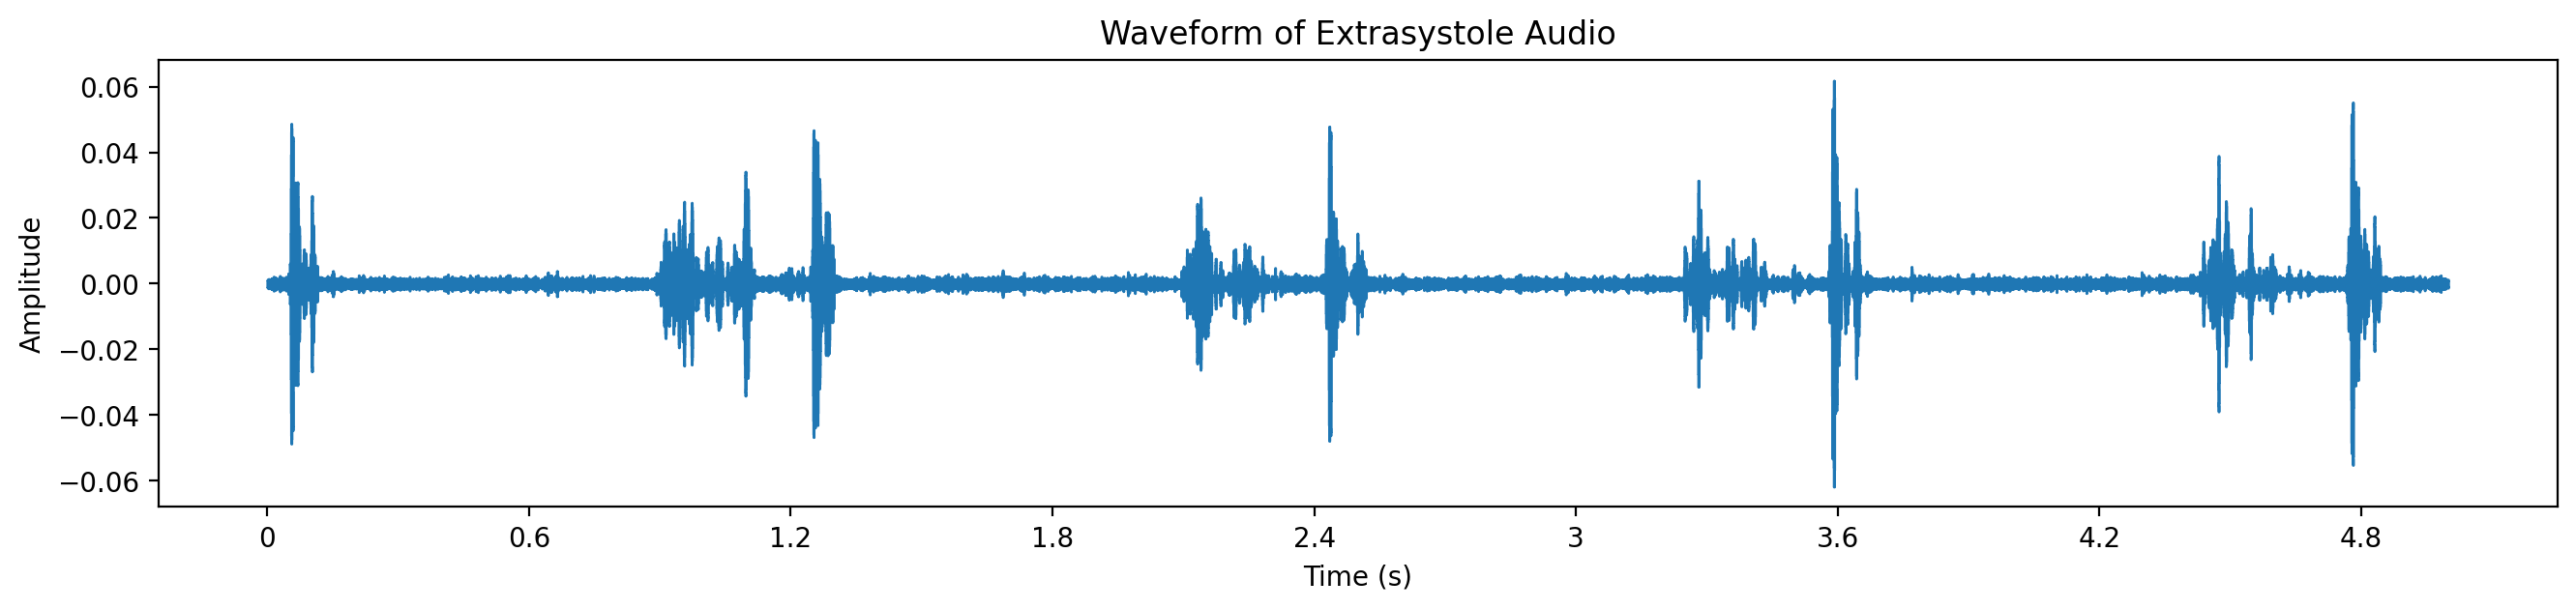

In [29]:
# show it
plt.figure(figsize=(16, 3))
librosa.display.waveshow(y5, sr=sr5)
plt.title('Waveform of Extrasystole Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [30]:
# Here's a sample generate mfccs from a wave file
normal_file=INPUT_DIR+"/set_a/normal__201106111136.wav"
#y, sr = librosa.load(sample_file, offset=7, duration=7)
y, sr = librosa.load(normal_file)
mfccs = librosa.feature.mfcc(y=y, sr=sr)
print (mfccs)

[[-8.19133759e+01 -1.48075592e+02 -4.07291504e+02 ... -3.67867584e+02
  -3.74120544e+02 -3.78470306e+02]
 [ 1.23795578e+02  1.26224556e+02  1.39225861e+02 ...  1.51238556e+02
   1.61779205e+02  1.61170776e+02]
 [ 1.74565067e+01  1.97444687e+01  1.99568138e+01 ...  2.92980957e+01
   2.56728249e+01  3.37232399e+01]
 ...
 [-7.11672306e-01 -1.52796209e-01 -1.35706568e+00 ... -2.95903742e-01
   3.51410031e-01  2.20139217e+00]
 [-2.79016399e+00 -2.13423014e+00  4.88217026e-02 ...  2.55818462e+00
   3.48192453e-03  5.44769001e+00]
 [-1.38848275e-01  3.35699260e-01 -2.94197679e+00 ...  2.39368153e+00
  -1.47538400e+00  3.34842205e-01]]


In [31]:
# Use a pre-computed log-power Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
log_S=librosa.feature.mfcc(S=librosa.power_to_db(S))
print (log_S)

[[-6.19826889e+01 -1.28008362e+02 -3.90283020e+02 ... -3.50583923e+02
  -3.54071747e+02 -3.58922791e+02]
 [ 1.13760162e+02  1.16467430e+02  1.35765884e+02 ...  1.49861938e+02
   1.57678711e+02  1.58090637e+02]
 [ 2.19686203e+01  2.43651562e+01  1.18758545e+01 ...  2.01783695e+01
   1.87385635e+01  2.76223526e+01]
 ...
 [-1.37634134e+00 -7.92668581e-01 -2.06323290e+00 ...  2.91040277e+00
  -1.41850114e+00  1.55428171e+00]
 [-2.64943242e+00 -2.29667544e+00 -3.48219705e+00 ...  1.37113619e+00
   3.46585214e-02 -1.58002543e+00]
 [-4.14034891e+00 -4.16323566e+00 -1.68562305e+00 ...  4.19539571e-01
   6.43803954e-01 -3.50527716e+00]]


In [32]:
# Get more components
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
#print (mfccs)

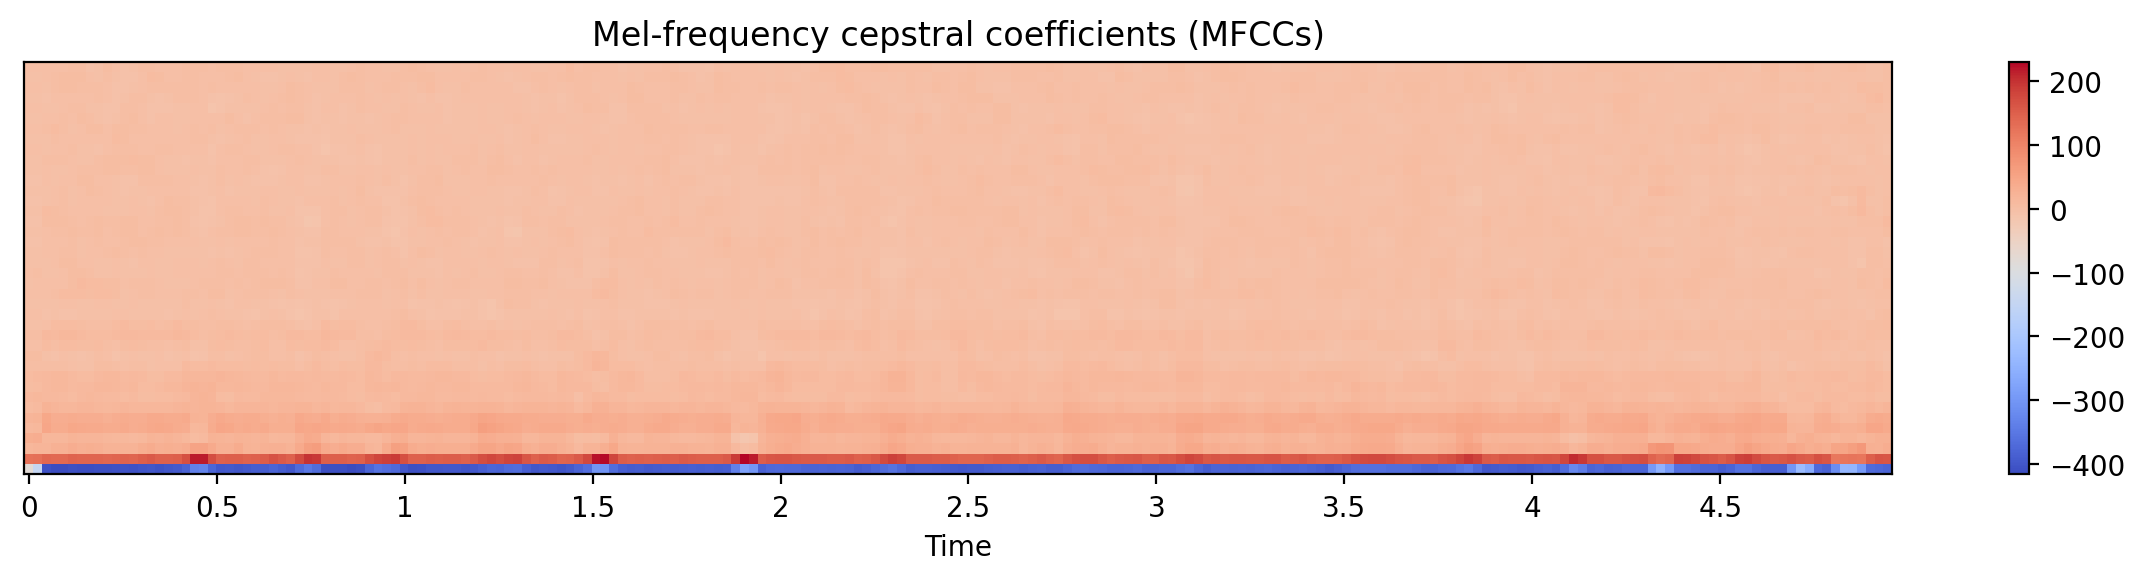

In [33]:
# Visualize the MFCC series
# Mel-frequency cepstral coefficients (MFCCs)
plt.figure(figsize=(12, 3))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('Mel-frequency cepstral coefficients (MFCCs)')
plt.tight_layout()

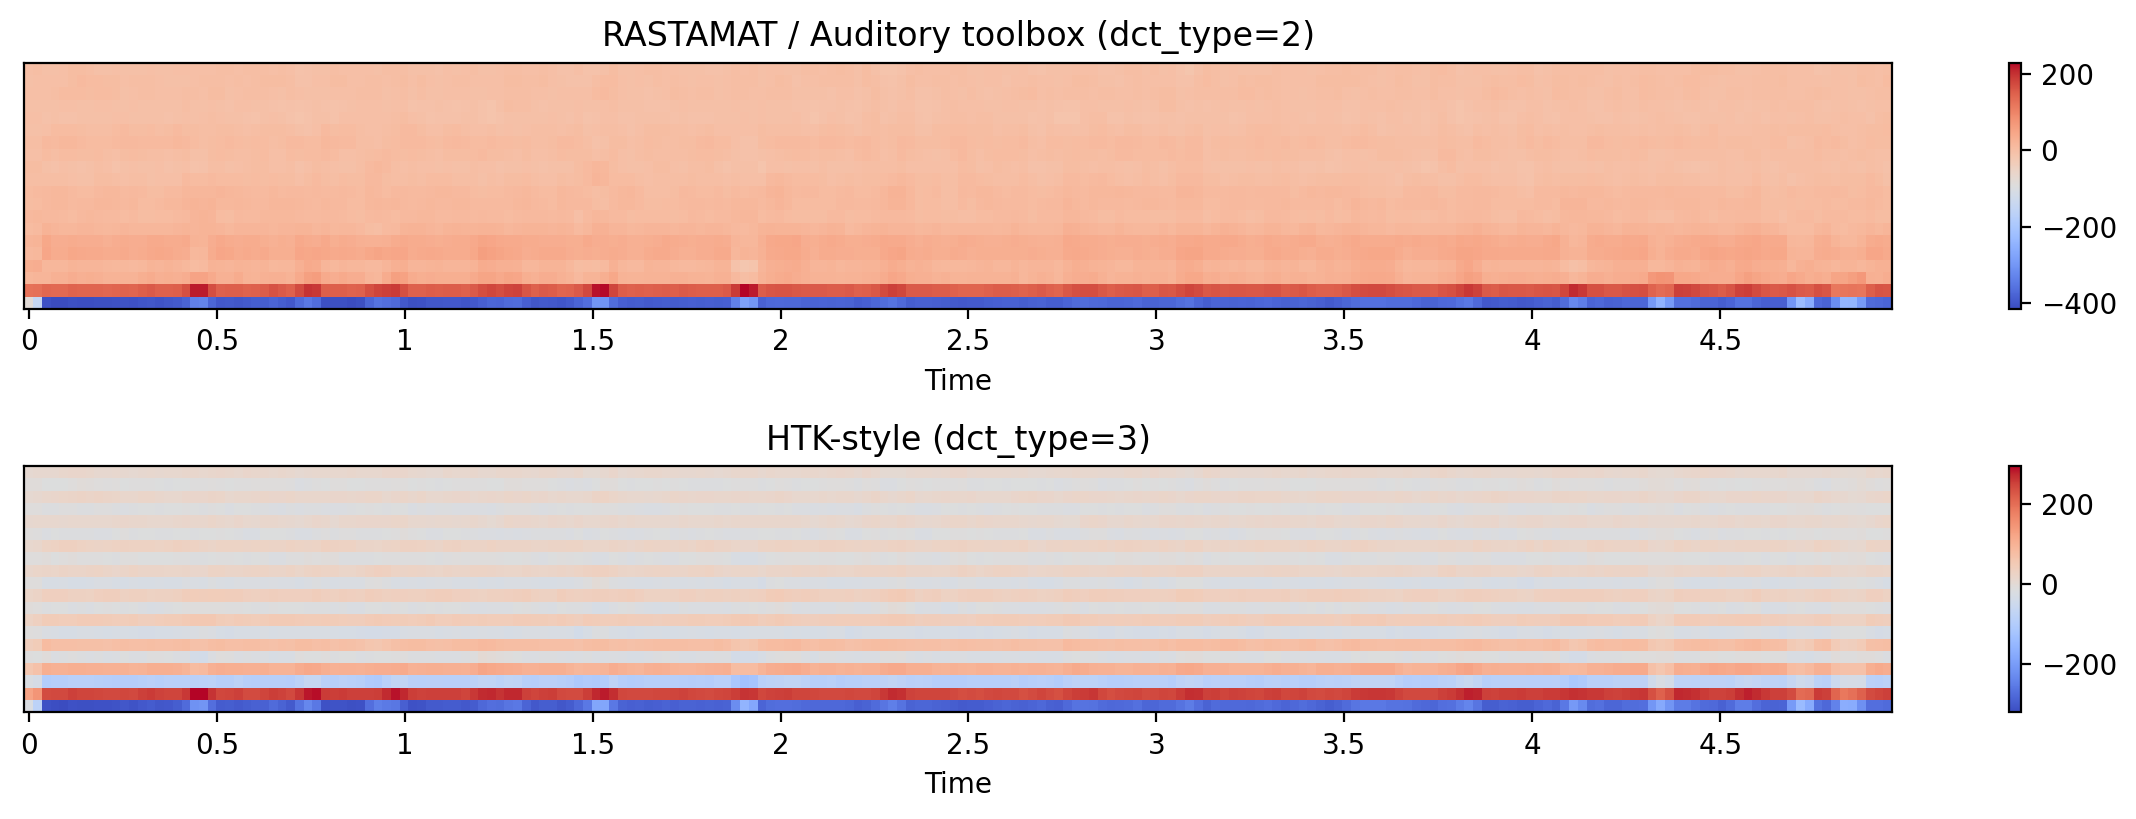

In [34]:
# Compare different DCT bases
m_slaney = librosa.feature.mfcc(y=y, sr=sr, dct_type=2)

#m_dct1 = librosa.feature.mfcc(y=y, sr=sr, dct_type=1)
plt.figure(figsize=(12, 6))
#plt.subplot(3, 1, 1)
#librosa.display.specshow(m_dct1, x_axis='time')
#plt.title('Discrete cosine transform (dct_type=1)')
#plt.colorbar()
m_htk = librosa.feature.mfcc(y=y, sr=sr, dct_type=3)
plt.subplot(3, 1, 2)
librosa.display.specshow(m_slaney, x_axis='time')
plt.title('RASTAMAT / Auditory toolbox (dct_type=2)')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(m_htk, x_axis='time')
plt.title('HTK-style (dct_type=3)')
plt.colorbar()
plt.tight_layout()

In [35]:
# Get onset times from a signal
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
librosa.frames_to_time(onset_frames, sr=sr)

array([0.48761905, 0.7662585 , 0.95201814, 1.25387755, 1.55573696,
       1.92725624, 2.32199546, 2.80961451, 3.11147392, 3.80807256,
       3.85451247, 4.13315193, 4.36535147, 4.59755102, 4.73687075,
       4.85297052])

In [36]:
import librosa
import numpy as np

o_env = librosa.onset.onset_strength(y=y, sr=sr)


times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)

onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)


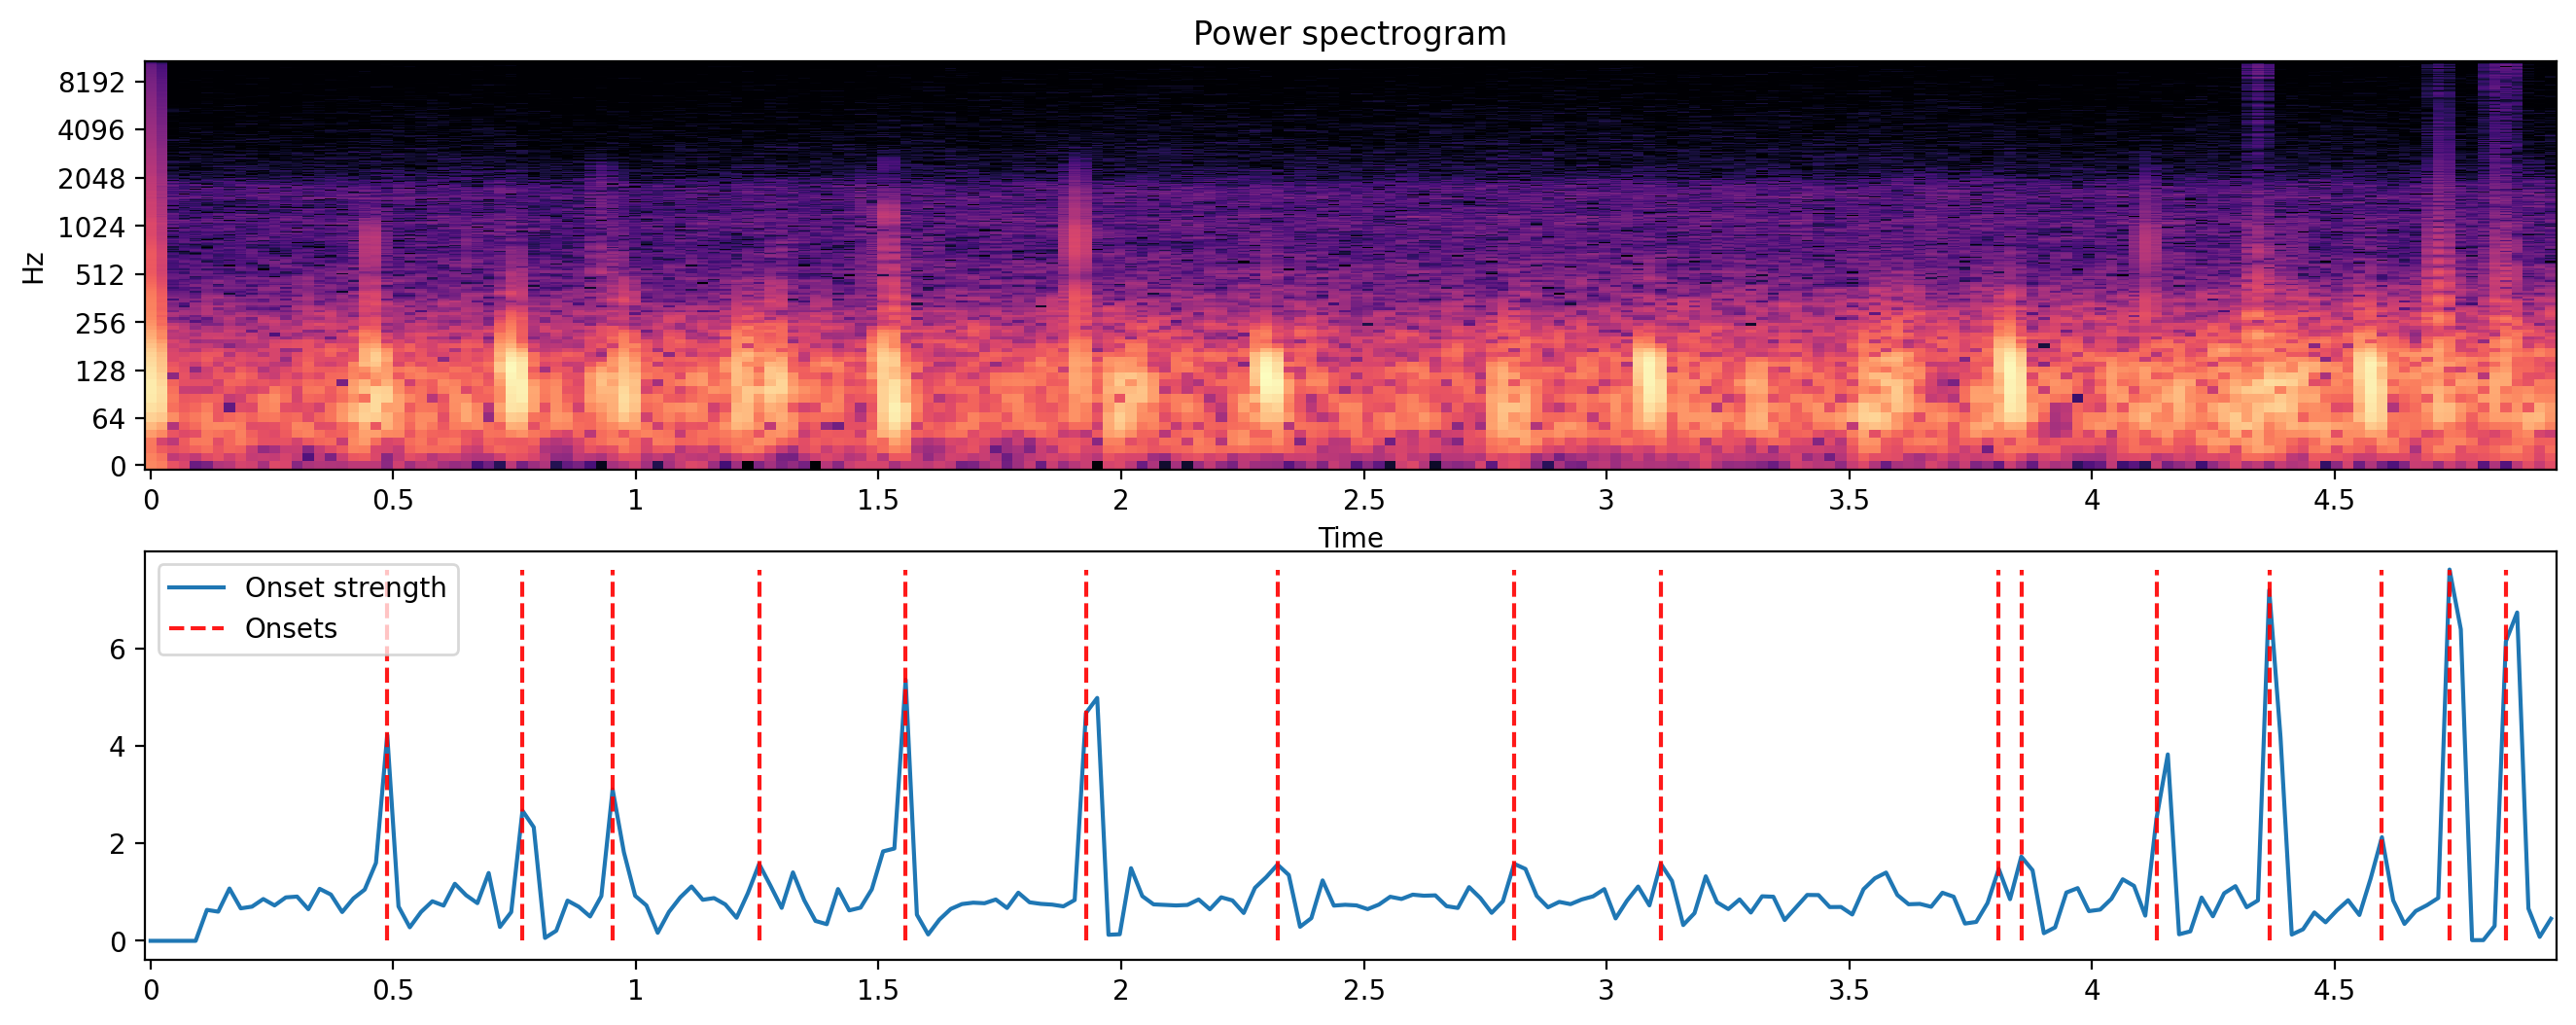

In [37]:
# visualize it
D = np.abs(librosa.stft(y))
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2, sharex=ax1)

plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)

In [38]:
oenv = librosa.onset.onset_strength(y=y, sr=sr)
# Detect events without backtracking
onset_raw = librosa.onset.onset_detect(onset_envelope=oenv, backtrack=False)
# Backtrack the events using the onset envelope
onset_bt = librosa.onset.onset_backtrack(onset_raw, oenv)
# Backtrack the events using the RMS values
rms = librosa.feature.rms(S=np.abs(librosa.stft(y=y)))
onset_bt_rms = librosa.onset.onset_backtrack(onset_raw, rms[0])

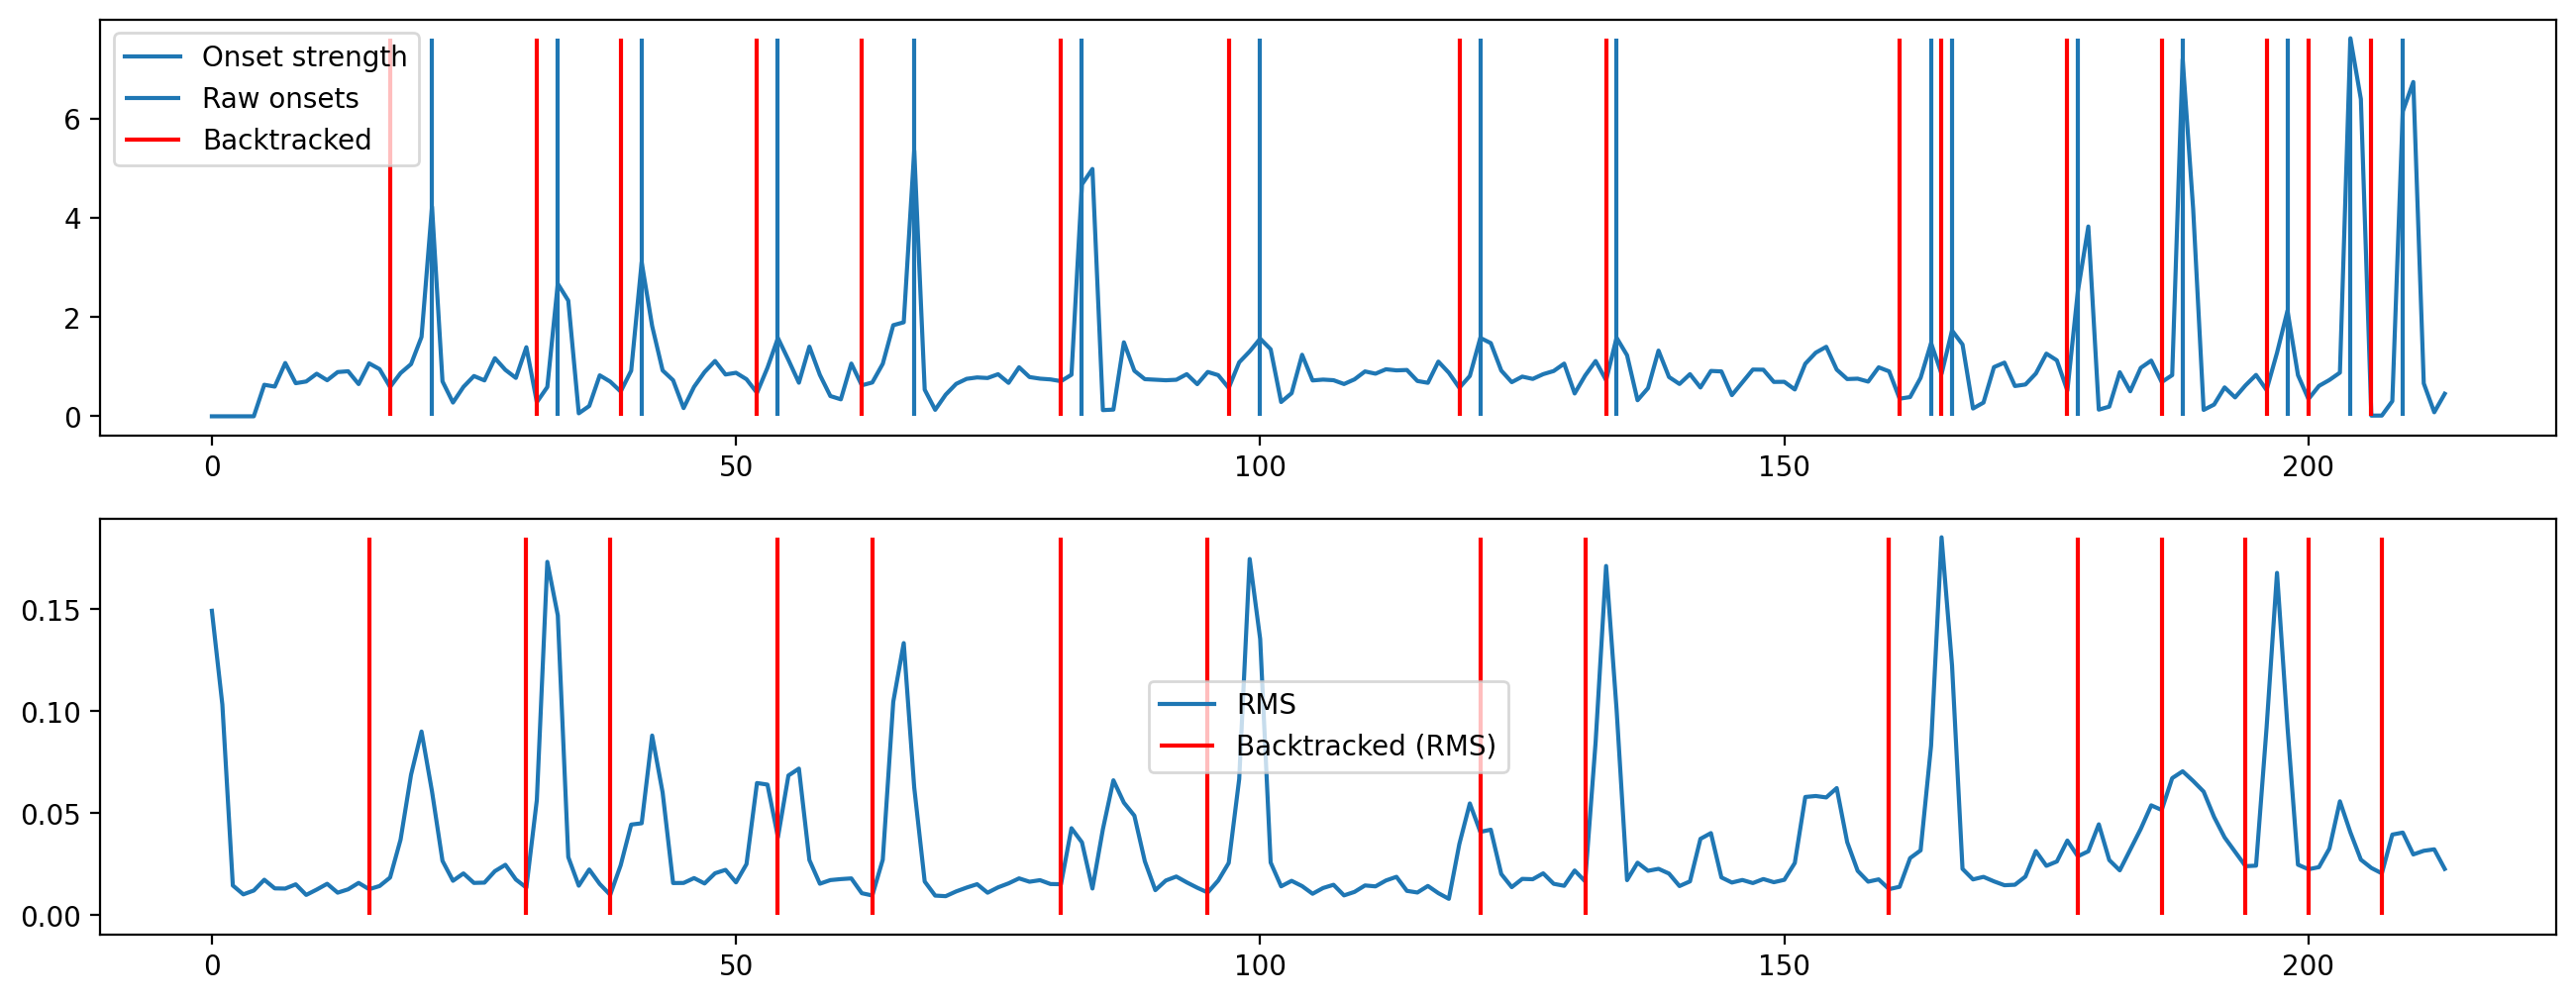

In [39]:
# Plot the results
plt.figure(figsize=(16, 6))
plt.subplot(2,1,1)
plt.plot(oenv, label='Onset strength')
plt.vlines(onset_raw, 0, oenv.max(), label='Raw onsets')
plt.vlines(onset_bt, 0, oenv.max(), label='Backtracked', color='r')
plt.legend(frameon=True, framealpha=0.75)
plt.subplot(2,1,2)
plt.plot(rms[0], label='RMS')
plt.vlines(onset_bt_rms, 0, rms.max(), label='Backtracked (RMS)', color='r')
plt.legend(frameon=True, framealpha=0.75)

(-0.2658684807256236, 5.583238095238095, -0.15000000000000002, 3.15)

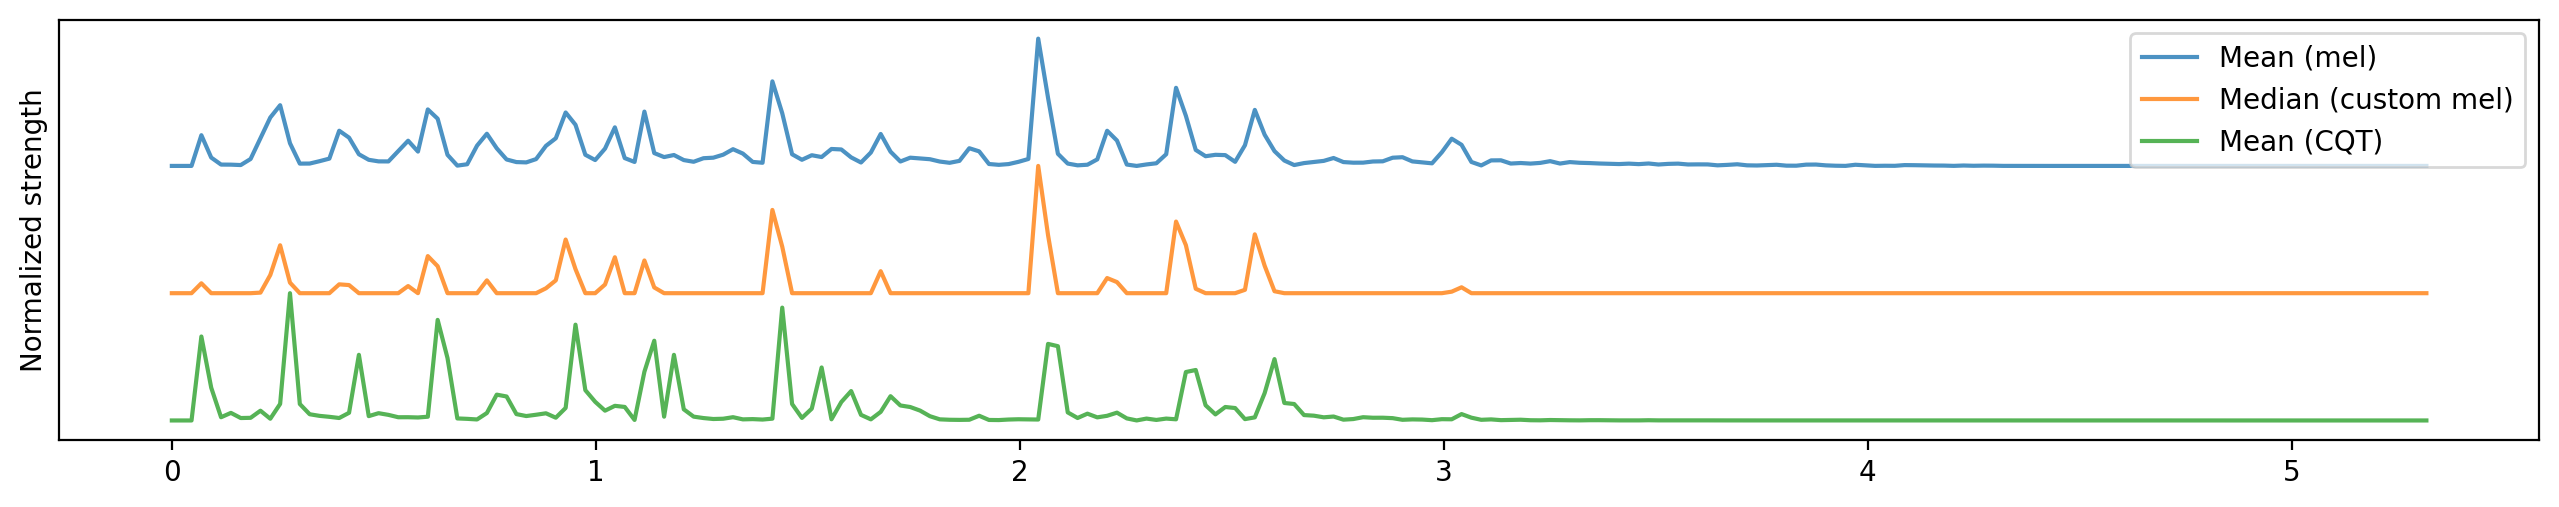

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Load your audio file
y, sr = librosa.load(librosa.example('trumpet'))

# Compute the STFT
D = np.abs(librosa.stft(y))
times = librosa.frames_to_time(np.arange(D.shape[1]))

plt.figure(figsize=(16, 6))

# Uncomment and display the power spectrogram if needed
# ax1 = plt.subplot(2, 1, 1)
# librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
# plt.title('Power spectrogram')

# Construct a standard onset function
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
plt.subplot(2, 1, 1)
plt.plot(times, 2 + onset_env / onset_env.max(), alpha=0.8, label='Mean (mel)')

# Median onset strength
onset_env_median = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median, fmax=8000, n_mels=256)
plt.plot(times, 1 + (onset_env_median / onset_env_median.max()), alpha=0.8, label='Median (custom mel)')

# Precompute the Constant-Q transform
C = np.abs(librosa.cqt(y=y, sr=sr))

# Compute onset strength using the precomputed CQT
onset_env_cqt = librosa.onset.onset_strength(S=C, sr=sr)
plt.plot(times, onset_env_cqt / onset_env_cqt.max(), alpha=0.8, label='Mean (CQT)')
plt.legend(frameon=True, framealpha=0.75)
plt.ylabel('Normalized strength')
plt.yticks([])
plt.axis('tight')


In [41]:
print("Number of training examples=", train_ab.shape[0], "  Number of classes=", len(train_ab.label.unique()))

Number of training examples= 832   Number of classes= 6


In [42]:
def audio_norm(data):
    max_data = np.max(data)
    min_data = np.min(data)
    data = (data-min_data)/(max_data-min_data+0.0001)
    return data-0.5

# get audio data without padding highest qualify audio
def load_file_data_without_change(folder,file_names, duration=3, sr=16000):
    input_length=sr*duration
    # function to load files and extract features
    # file_names = glob.glob(os.path.join(folder, '*.wav'))
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            # use kaiser_fast technique for faster extraction
            X, sr = librosa.load( sound_file, res_type='kaiser_fast') 
            dur = librosa.get_duration(y=X, sr=sr)
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0) 
        except Exception as e:
            print("Error encountered while parsing file: ", file)
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data


# get audio data with a fix padding may also chop off some file
def load_file_data (folder,file_names, duration=12, sr=16000):
    input_length=sr*duration
    # function to load files and extract features
    # file_names = glob.glob(os.path.join(folder, '*.wav'))
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            # use kaiser_fast technique for faster extraction
            X, sr = librosa.load( sound_file, sr=sr, duration=duration,res_type='kaiser_fast') 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, input_length)                
            #normalized raw audio 
            # y = audio_norm(y)            
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

In [43]:
# simple encoding of categories, limited to 3 types
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Map label text to integer
CLASSES = ['artifact','murmur','normal']
# {'artifact': 0, 'murmur': 1, 'normal': 3}
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
# map integer to label text
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
 
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [44]:
# load dataset-a, keep them separate for testing purpose
import os, fnmatch

A_folder=INPUT_DIR+'/set_a/'
# set-a
A_artifact_files = fnmatch.filter(os.listdir(INPUT_DIR), 'artifact*.wav')
A_artifact_sounds = load_file_data(folder=A_folder,file_names=A_artifact_files, duration=MAX_SOUND_CLIP_DURATION)
A_artifact_labels = [0 for items in A_artifact_files]

A_normal_files = fnmatch.filter(os.listdir(INPUT_DIR), 'normal*.wav')
A_normal_sounds = load_file_data(folder=A_folder,file_names=A_normal_files, duration=MAX_SOUND_CLIP_DURATION)
A_normal_labels = [2 for items in A_normal_sounds]

A_extrahls_files = fnmatch.filter(os.listdir(INPUT_DIR), 'extrahls*.wav')
A_extrahls_sounds = load_file_data(folder=A_folder,file_names=A_extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
A_extrahls_labels = [1 for items in A_extrahls_sounds]

A_murmur_files = fnmatch.filter(os.listdir(INPUT_DIR), 'murmur*.wav')
A_murmur_sounds = load_file_data(folder=A_folder,file_names=A_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
A_murmur_labels = [1 for items in A_murmur_files]

# test files
A_unlabelledtest_files = fnmatch.filter(os.listdir(INPUT_DIR), 'Aunlabelledtest*.wav')
A_unlabelledtest_sounds = load_file_data(folder=A_folder,file_names=A_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
A_unlabelledtest_labels = [-1 for items in A_unlabelledtest_sounds]

print ("loaded dataset-a")

loaded dataset-a


In [45]:
B_folder='C:/Users/krake/Downloads/deep learning/Heart-Beat-Classification-master/heartbeatclass/input/'
# set-b
B_normal_files = fnmatch.filter(os.listdir('C:/Users/krake/Downloads/deep learning/Heart-Beat-Classification-master/heartbeatclass/input/'), 'normal*.wav')  # include noisy files
B_normal_sounds = load_file_data(folder=B_folder,file_names=B_normal_files, duration=MAX_SOUND_CLIP_DURATION)
B_normal_labels = [2 for items in B_normal_sounds]

B_murmur_files = fnmatch.filter(os.listdir('C:/Users/krake/Downloads/deep learning/Heart-Beat-Classification-master/heartbeatclass/input/'), 'murmur*.wav')  # include noisy files
B_murmur_sounds = load_file_data(folder=B_folder,file_names=B_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
B_murmur_labels = [1 for items in B_murmur_files]

B_extrastole_files = fnmatch.filter(os.listdir('C:/Users/krake/Downloads/deep learning/Heart-Beat-Classification-master/heartbeatclass/input/'), 'extrastole*.wav')
B_extrastole_sounds = load_file_data(folder=B_folder,file_names=B_extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
B_extrastole_labels = [1 for items in B_extrastole_files]

#test files
B_unlabelledtest_files = fnmatch.filter(os.listdir('C:/Users/krake/Downloads/deep learning/Heart-Beat-Classification-master/heartbeatclass/input/'), 'Bunlabelledtest*.wav')
B_unlabelledtest_sounds = load_file_data(folder=B_folder,file_names=B_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
B_unlabelledtest_labels = [-1 for items in B_unlabelledtest_sounds]
print ("loaded dataset-b")

loaded dataset-b


In [46]:
import os
import fnmatch
import numpy as np
import librosa

# Constants
INPUT_DIR = 'C:/Users/krake/Downloads/deep learning/Heart-Beat-Classification-master/heartbeatclass/input'
MAX_SOUND_CLIP_DURATION = 10  # Adjust as needed

def load_file_data(folder, file_names, duration, sr=22050):
    data = []
    input_length = sr * duration

    for file_name in file_names:
        try:
            file_path = os.path.join(folder, file_name)
            X, sr = librosa.load(file_path, sr=sr)
            if len(X) > input_length:
                X = X[:input_length]
            else:
                X = librosa.util.fix_length(X, size=input_length)
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T, axis=0)
            data.append(mfccs)
        except Exception as e:
            print(f"Error encountered while parsing file: {file_name}")
            print(e)
    return np.array(data)

# Load dataset-a
A_folder = os.path.join(INPUT_DIR, 'set_a')

A_artifact_files = fnmatch.filter(os.listdir(A_folder), 'artifact*.wav')
A_artifact_sounds = load_file_data(folder=A_folder, file_names=A_artifact_files, duration=MAX_SOUND_CLIP_DURATION)
A_artifact_labels = [0 for _ in A_artifact_files]

A_normal_files = fnmatch.filter(os.listdir(A_folder), 'normal*.wav')
A_normal_sounds = load_file_data(folder=A_folder, file_names=A_normal_files, duration=MAX_SOUND_CLIP_DURATION)
A_normal_labels = [2 for _ in A_normal_files]

A_extrahls_files = fnmatch.filter(os.listdir(A_folder), 'extrahls*.wav')
A_extrahls_sounds = load_file_data(folder=A_folder, file_names=A_extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
A_extrahls_labels = [1 for _ in A_extrahls_sounds]

A_murmur_files = fnmatch.filter(os.listdir(A_folder), 'murmur*.wav')
A_murmur_sounds = load_file_data(folder=A_folder, file_names=A_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
A_murmur_labels = [1 for _ in A_murmur_files]

# test files
A_unlabelledtest_files = fnmatch.filter(os.listdir(A_folder), 'Aunlabelledtest*.wav')
A_unlabelledtest_sounds = load_file_data(folder=A_folder, file_names=A_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
A_unlabelledtest_labels = [-1 for _ in A_unlabelledtest_sounds]

print("Loaded dataset-a")

# Verify shapes
print("A_artifact_sounds shape:", A_artifact_sounds.shape)
print("A_normal_sounds shape:", A_normal_sounds.shape)
print("A_extrahls_sounds shape:", A_extrahls_sounds.shape)
print("A_murmur_sounds shape:", A_murmur_sounds.shape)
print("A_unlabelledtest_sounds shape:", A_unlabelledtest_sounds.shape)

# Load dataset-b in a similar way
B_folder = os.path.join(INPUT_DIR, 'set_b')

# Assuming B_* files are loaded similarly as A_* files
B_normal_files = fnmatch.filter(os.listdir(B_folder), 'normal*.wav')
B_normal_sounds = load_file_data(folder=B_folder, file_names=B_normal_files, duration=MAX_SOUND_CLIP_DURATION)
B_normal_labels = [2 for _ in B_normal_files]

B_murmur_files = fnmatch.filter(os.listdir(B_folder), 'murmur*.wav')
B_murmur_sounds = load_file_data(folder=B_folder, file_names=B_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
B_murmur_labels = [1 for _ in B_murmur_files]

B_extrastole_files = fnmatch.filter(os.listdir(B_folder), 'extrastole*.wav')
B_extrastole_sounds = load_file_data(folder=B_folder, file_names=B_extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
B_extrastole_labels = [1 for _ in B_extrastole_sounds]

B_unlabelledtest_files = fnmatch.filter(os.listdir(B_folder), 'Bunlabelledtest*.wav')
B_unlabelledtest_sounds = load_file_data(folder=B_folder, file_names=B_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
B_unlabelledtest_labels = [-1 for _ in B_unlabelledtest_sounds]

print("Loaded dataset-b")

# Verify shapes
print("B_normal_sounds shape:", B_normal_sounds.shape)
print("B_murmur_sounds shape:", B_murmur_sounds.shape)
print("B_extrastole_sounds shape:", B_extrastole_sounds.shape)
print("B_unlabelledtest_sounds shape:", B_unlabelledtest_sounds.shape)

# Combine set-a and set-b
try:
    x_data = np.concatenate((A_artifact_sounds, A_normal_sounds, A_extrahls_sounds, A_murmur_sounds, 
                             B_normal_sounds, B_murmur_sounds, B_extrastole_sounds))
    y_data = np.concatenate((A_artifact_labels, A_normal_labels, A_extrahls_labels, A_murmur_labels,
                             B_normal_labels, B_murmur_labels, B_extrastole_labels))
    test_x = np.concatenate((A_unlabelledtest_sounds, B_unlabelledtest_sounds))
    test_y = np.concatenate((A_unlabelledtest_labels, B_unlabelledtest_labels))
    print("Combined training data record: ", len(y_data), len(test_y))
except ValueError as e:
    print(f"Error during concatenation: {e}")

print("Concatenation complete.")


Loaded dataset-a
A_artifact_sounds shape: (40, 40)
A_normal_sounds shape: (31, 40)
A_extrahls_sounds shape: (19, 40)
A_murmur_sounds shape: (34, 40)
A_unlabelledtest_sounds shape: (52, 40)
Loaded dataset-b
B_normal_sounds shape: (320, 40)
B_murmur_sounds shape: (95, 40)
B_extrastole_sounds shape: (46, 40)
B_unlabelledtest_sounds shape: (195, 40)
Combined training data record:  585 247
Concatenation complete.


In [47]:
print ("combined training data record: ",len(y_data), len(test_y))

combined training data record:  585 247


In [48]:
import keras
# shuffle - whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.
# random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

seed = 1000
# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.9, random_state=seed, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.9, random_state=seed, shuffle=True)

# One-Hot encoding for classes
y_train = np.array(keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(keras.utils.to_categorical(y_val, len(CLASSES)))
test_y=np.array(keras.utils.to_categorical(test_y, len(CLASSES)))

In [49]:
print ("label shape: ", y_data.shape)
print ("data size of the array: : %s" % y_data.size)
print ("length of one array element in bytes: ", y_data.itemsize)
print ("total bytes consumed by the elements of the array: ", y_data.nbytes)
print (y_data[1])
print ("")
print ("audio data shape: ", x_data.shape)
print ("data size of the array: : %s" % x_data.size)
print ("length of one array element in bytes: ", x_data.itemsize)
print ("total bytes consumed by the elements of the array: ", x_data.nbytes)
#print (x_data[1])
print ("")
print ("training data shape: ", x_train.shape)
print ("training label shape: ", y_train.shape)
print ("")
print ("validation data shape: ", x_val.shape)
print ("validation label shape: ", y_val.shape)
print ("")
print ("test data shape: ", x_test.shape)
print ("test label shape: ", y_test.shape)

label shape:  (585,)
data size of the array: : 585
length of one array element in bytes:  4
total bytes consumed by the elements of the array:  2340
0

audio data shape:  (585, 40)
data size of the array: : 23400
length of one array element in bytes:  4
total bytes consumed by the elements of the array:  93600

training data shape:  (473, 40)
training label shape:  (473, 3)

validation data shape:  (53, 40)
validation label shape:  (53, 3)

test data shape:  (59, 40)
test label shape:  (59, 3)


In [50]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard, ProgbarLogger
from keras.utils import to_categorical
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import itertools

In [51]:
print('Build LSTM RNN model ...')
model = Sequential()
model.add(LSTM(units=64, dropout=0.05, recurrent_dropout=0.20, return_sequences=True,input_shape = (40,1)))
model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.20, return_sequences=False))
model.add(Dense(len(CLASSES), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['acc','mse', 'mae', 'mape'])
model.summary()

Build LSTM RNN model ...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 40, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,411 (114.89 KB)

 Trainable params: 29,411 (114.89 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
%%time
# saved model checkpoint file
best_model_file = "./best_model_trained.keras"  # Changed to .keras extension
MAX_PATIENT = 12
MAX_EPOCHS = 100
MAX_BATCH = 32

# callbacks
# removed EarlyStopping(patience=MAX_PATIENT)
callback = [ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
            ModelCheckpoint(filepath=best_model_file, monitor='loss', verbose=1, save_best_only=True)]

print("training started..... please wait.")
# training
history = model.fit(x_train, y_train, 
                    batch_size=MAX_BATCH, 
                    epochs=MAX_EPOCHS,
                    verbose=0,
                    validation_data=(x_val, y_val),
                    callbacks=callback) 

print("training finished!")


training started..... please wait.

Epoch 1: loss improved from inf to 0.98391, saving model to ./best_model_trained.keras

Epoch 2: loss improved from 0.98391 to 0.84619, saving model to ./best_model_trained.keras

Epoch 3: loss improved from 0.84619 to 0.78106, saving model to ./best_model_trained.keras

Epoch 4: loss improved from 0.78106 to 0.75312, saving model to ./best_model_trained.keras

Epoch 5: loss improved from 0.75312 to 0.73944, saving model to ./best_model_trained.keras

Epoch 6: loss improved from 0.73944 to 0.73382, saving model to ./best_model_trained.keras

Epoch 7: loss improved from 0.73382 to 0.70197, saving model to ./best_model_trained.keras

Epoch 8: loss improved from 0.70197 to 0.69841, saving model to ./best_model_trained.keras

Epoch 9: loss improved from 0.69841 to 0.69215, saving model to ./best_model_trained.keras

Epoch 10: loss improved from 0.69215 to 0.67695, saving model to ./best_model_trained.keras

Epoch 11: loss did not improve from 0.67695

Ep

In [53]:
#Model Evaluation

# Keras reported accuracy:
score = model.evaluate(x_train, y_train, verbose=0) 
print ("model train data score       : ",round(score[1]*100) , "%")

score = model.evaluate(x_test, y_test, verbose=0) 
print ("model test data score        : ",round(score[1]*100) , "%")

score = model.evaluate(x_val, y_val, verbose=0) 
print ("model validation data score  : ", round(score[1]*100), "%")


model train data score       :  74 %
model test data score        :  75 %
model validation data score  :  77 %


<Figure size 2200x1000 with 0 Axes>

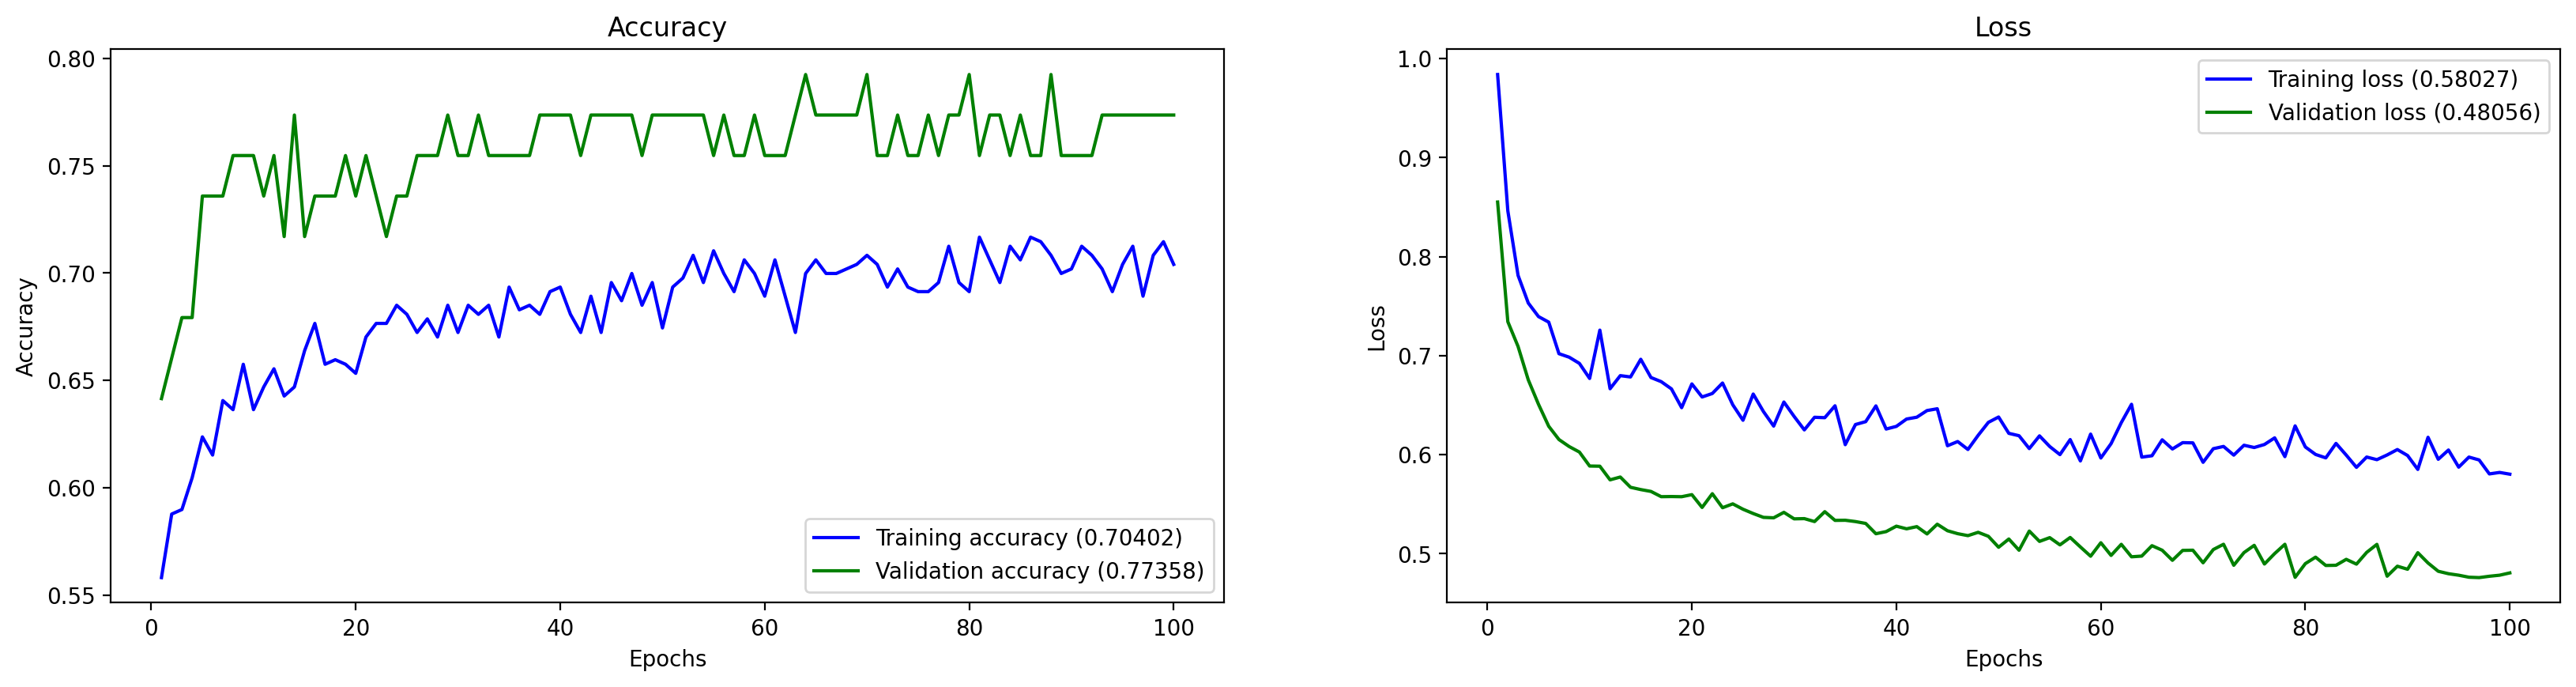

CPU times: total: 219 ms
Wall time: 448 ms


In [54]:
%%time
#Plot Keras History
#Plot loss and accuracy for the training and validation set.
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    plt.figure(figsize=(22,10))
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    ## Accuracy
    plt.figure(221, figsize=(20,10))
    ## Accuracy
    # plt.figure(2,figsize=(14,5))
    plt.subplot(221, title='Accuracy')
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    ## Loss
    plt.subplot(222, title='Loss')
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# plot history
plot_history(history)

In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [56]:
# prediction class 
y_pred_prob = model.predict(x_test, batch_size=32)
y_pred = np.argmax(y_pred_prob, axis=-1)
print("Predicted classes for test data:")
for i in range(len(y_pred)):
    print(f"Sample {i}: {y_pred[i]} - {int_to_label[y_pred[i]]}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 417ms/step
Predicted classes for test data:
Sample 0: 2 - normal
Sample 1: 2 - normal
Sample 2: 2 - normal
Sample 3: 2 - normal
Sample 4: 2 - normal
Sample 5: 0 - artifact
Sample 6: 2 - normal
Sample 7: 2 - normal
Sample 8: 2 - normal
Sample 9: 2 - normal
Sample 10: 1 - murmur
Sample 11: 2 - normal
Sample 12: 1 - murmur
Sample 13: 2 - normal
Sample 14: 2 - normal
Sample 15: 2 - normal
Sample 16: 2 - normal
Sample 17: 2 - normal
Sample 18: 2 - normal
Sample 19: 1 - murmur
Sample 20: 1 - murmur
Sample 21: 2 - normal
Sample 22: 2 - normal
Sample 23: 2 - normal
Sample 24: 2 - normal
Sample 25: 2 - normal
Sample 26: 2 - normal
Sample 27: 2 - normal
Sample 28: 2 - normal
Sample 29: 2 - normal
Sample 30: 2 - normal
Sample 31: 2 - normal
Sample 32: 1 - murmur
Sample 33: 1 - murmur
Sample 34: 1 - murmur
Sample 35: 2 - normal
Sample 36: 2 - normal
Sample 37: 2 - normal
Sample 38: 2 - normal
Sample 39: 2 - normal
Sample 40: 2 - normal
Sample 41: 2 - normal
Sample 42: 2

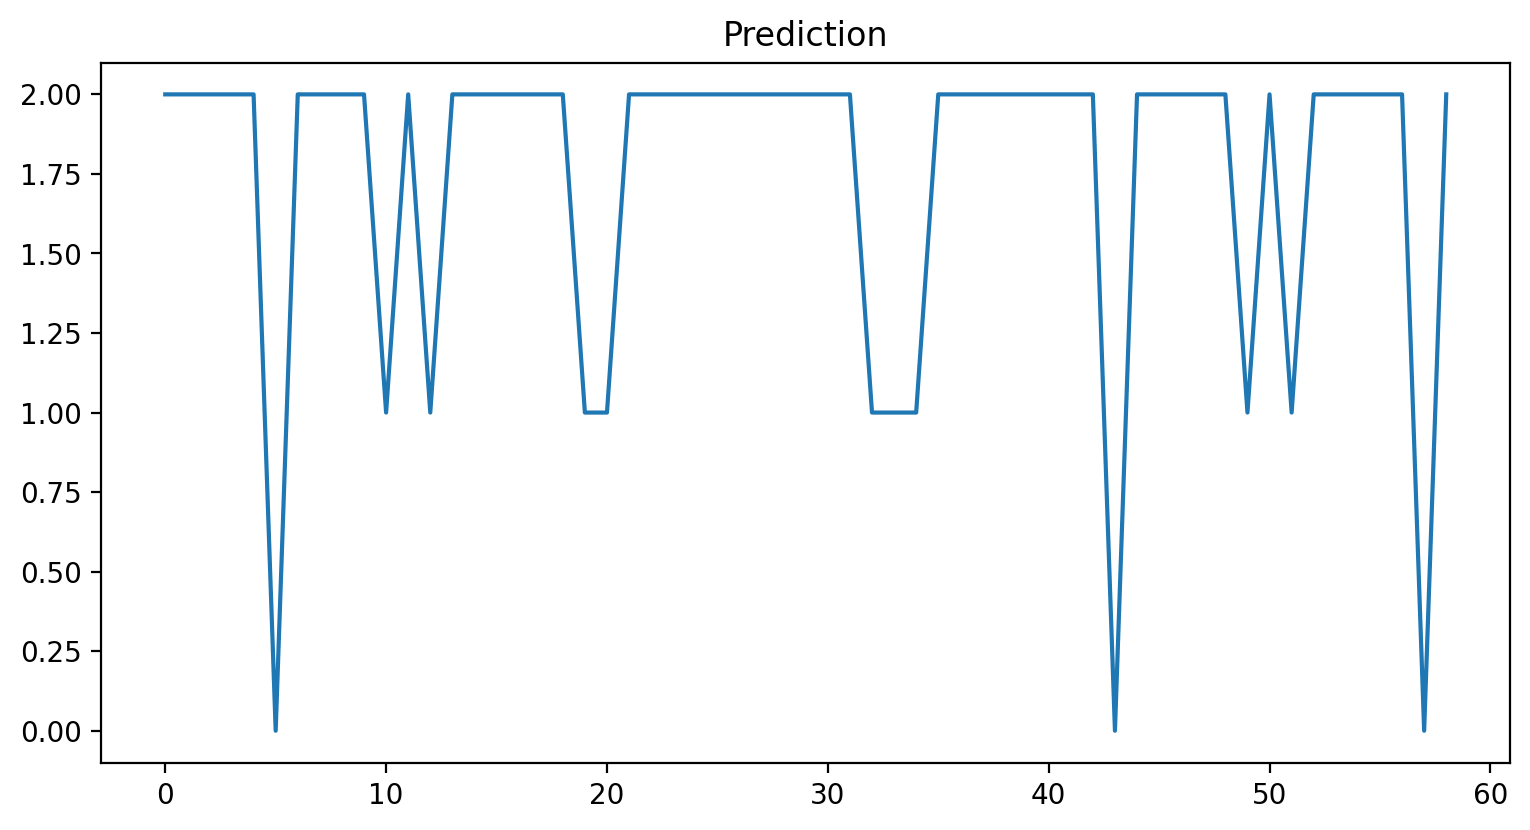

In [57]:
plt.figure(1,figsize=(20,10))
# plot Classification Metrics: Accuracy 
plt.subplot(221, title='Prediction')
plt.plot(y_pred)
plt.show()


In [58]:
print (best_model_file)

./best_model_trained.keras


In [59]:
### Loading a Check-Pointed Neural Network Model
# How to load and use weights from a checkpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
print('Build LSTM RNN model ...')
model = Sequential()
model.add(LSTM(units=64, dropout=0.05, recurrent_dropout=0.35, return_sequences=True,input_shape = (40,1)))
model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
model.add(Dense(len(CLASSES), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc','mse', 'mae', 'mape', 'cosine'])
model.summary()
# load weights
model.load_weights(best_model_file)
# Compile model (required to make predictions)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")

Build LSTM RNN model ...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 40, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,411 (114.89 KB)

 Trainable params: 29,411 (114.89 KB)

 Non-trainable params: 0 (0.00 B)

Created model and loaded weights from file


In [60]:
# Make predictions
y_pred_prob = model.predict(x_test, batch_size=32)
y_pred = np.argmax(y_pred_prob, axis=-1)

# Evaluate model accuracy
scores = model.evaluate(x_test, y_test, verbose=0)

# Print model evaluation accuracy
print("Model evaluation accuracy: ", round(scores[1] * 100), "%")

# Print some predictions for demonstration
print("Sample predictions:")
for i in range(len(y_pred)):
    print(f"Sample {i}: Predicted={y_pred[i]} ({int_to_label[y_pred[i]]}), Actual={np.argmax(y_test[i])} ({int_to_label[np.argmax(y_test[i])]}), Probabilities={y_pred_prob[i]}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 404ms/step
Model evaluation accuracy:  75 %
Sample predictions:
Sample 0: Predicted=2 (normal), Actual=2 (normal), Probabilities=[0.00081925 0.26760808 0.7315727 ]
Sample 1: Predicted=2 (normal), Actual=2 (normal), Probabilities=[0.00090879 0.3307619  0.6683293 ]
Sample 2: Predicted=2 (normal), Actual=2 (normal), Probabilities=[0.00088409 0.25304443 0.7460716 ]
Sample 3: Predicted=2 (normal), Actual=2 (normal), Probabilities=[0.00111564 0.28999606 0.70888835]
Sample 4: Predicted=2 (normal), Actual=1 (murmur), Probabilities=[0.00109459 0.27391633 0.72498906]
Sample 5: Predicted=0 (artifact), Actual=0 (artifact), Probabilities=[0.9574126  0.0141201  0.02846726]
Sample 6: Predicted=2 (normal), Actual=2 (normal), Probabilities=[0.00163759 0.29120997 0.70715237]
Sample 7: Predicted=2 (normal), Actual=2 (normal), Probabilities=[0.00204317 0.300529   0.69742787]
Sample 8: Predicted=2 (normal), Actual=2 (normal), Probabilities=[0.00206869 0.28418067 0.71375066]
Samp